# Preensemble

In [1]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'     
blue4 = '#3182bd'     # passenger colour
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'   # dev colour
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'     # neutral drift colour
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [2]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [3]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
# from sklearn import datasets, linear_model
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit
import csv
from scipy.integrate import simps

# Import data

In [4]:
# import Razavi ages

filename3='Razavi_ages.csv'

list_of_control_ages_Razavi=[]
with open(filename3,'r') as csvfile:
    read_reader = csv.DictReader(csvfile, delimiter=',')
    
    for row in read_reader:
        
        status= str(row['tissue'])
        age=int(row['age'])
        
        if status == 'Control':
            list_of_control_ages_Razavi.append(age)
            
print('There are', len(list_of_control_ages_Razavi), 'controls in Razavi 2019')



There are 47 controls in Razavi 2019


In [5]:
# set up control IDs in Razavi
list_of_control_IDs = ['MRL0020GH', 'MRL0006GH', 'SDBBW044216563299GH1', 'MRL0014GH', 'MRL0003GH', 'MRL0125GH', 'SDBBW044216563303GH1', 'MRL0002GH', 'MRL0016GH', 'MRL0042GH', 'MRL0010GH', 'MRL0039GH', 'MRL0026GH', 'MRL0034GH', 'MRL0028GH', 'MRL0023GH', 'MRL0030GH', 'SDBBW044216563305GH1', 'MRL0024GH', 'MRL0021GH', 'SDBBW044216563300GH1', 'MRL0036GH', 'MRL0022GH', 'MRL0035GH', 'MRL0109SG', 'MRL0007GH', 'MRL0018GH', 'MRL0015GH', 'SDBBW044216563294GH1', 'MRL0033GH', 'MRL0025GH', 'MRL0019GH', 'MRL0040GH', 'SDBBW044216563304GH1', 'MRL0009GH', 'MRL0108GH', 'MRL0013GH', 'MRL0005GH', 'MRL0032GH', 'MRL0001GH', 'MRL0012GH', 'MRL0196GH', 'MRL0008GH', 'MRL0017GH', 'MRL0107GHMRL0124GH', 'MRL0031GH', 'MRL0011GH']

# map subject ID to SAME ID
filename = "Razavi metadata\delimited_maps\Study_analysis_sample.csv"
dict_of_healthy_SAME_IDs = {}

with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile

    for row in read_reader:
        subject_ID = str(row[7])
#         print(subject_ID)
        SAME_ID = str(row[8])
        tissue_type = str(row[5])
        
        if subject_ID in list_of_control_IDs and tissue_type == 'WBC_gDNA':
#             checked that this is bijective map 
            dict_of_healthy_SAME_IDs[SAME_ID] = subject_ID

list_of_healthy_SAME_IDs = list(dict_of_healthy_SAME_IDs.keys())
print('list_of_healthy_SAME_IDs',list_of_healthy_SAME_IDs)
print(len(list_of_healthy_SAME_IDs))


# map SAME ID to subject ID
filename = "Razavi metadata\delimited_maps\Analysis_sample_meta_info.csv"
dict_of_healthy_sample_IDs = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.reader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile

    for row in read_reader:
        SAME_ID = str(row[0])
        long_string_of_info= str(row[2])
        tissue_type = str(row[1])
        
        if SAME_ID in list_of_healthy_SAME_IDs:
            if tissue_type == 'WBC gDNA':
                tmp = long_string_of_info.split('subject_id=')[1]
                sample_ID = tmp.split(';case_or_control')[0]
#                 checked that it is bijective
                dict_of_healthy_sample_IDs[sample_ID] = SAME_ID
 
list_of_healthy_sample_IDs = list(dict_of_healthy_sample_IDs.keys())
print('list_of_healthy_sample_IDs', list_of_healthy_sample_IDs)
print(len(list_of_healthy_sample_IDs))

list_of_healthy_SAME_IDs ['SAMEA5847206', 'SAMEA5847192', 'SAMEA5847183', 'SAMEA5847200', 'SAMEA5847190', 'SAMEA5847224', 'SAMEA5847185', 'SAMEA5847189', 'SAMEA5847202', 'SAMEA5847221', 'SAMEA5847196', 'SAMEA5847222', 'SAMEA5847212', 'SAMEA5847218', 'SAMEA5847213', 'SAMEA5847209', 'SAMEA5847214', 'SAMEA5847187', 'SAMEA5847210', 'SAMEA5847207', 'SAMEA5847184', 'SAMEA5847220', 'SAMEA5847208', 'SAMEA5847219', 'SAMEA5847227', 'SAMEA5847193', 'SAMEA5847204', 'SAMEA5847201', 'SAMEA5847182', 'SAMEA5847217', 'SAMEA5847211', 'SAMEA5847205', 'SAMEA5847223', 'SAMEA5847186', 'SAMEA5847195', 'SAMEA5847226', 'SAMEA5847199', 'SAMEA5847191', 'SAMEA5847216', 'SAMEA5847188', 'SAMEA5847198', 'SAMEA5847228', 'SAMEA5847194', 'SAMEA5847203', 'SAMEA5847225', 'SAMEA5847215', 'SAMEA5847197']
47
list_of_healthy_sample_IDs ['W044216563376', 'W044216563342', 'W044216563299', 'W044216563366', 'W044216563330', 'W044216563917', 'W044216563303', 'W044216563329', 'W044216563368', 'W044216563615', 'W044216563359', 'W04

In [17]:
# import filtered SNVs from Razavi et al.
import csv
# only contains information of the control
filename = "Razavi filtered data\Razavi_filtered_variants.csv"


all_filtered_synonymous_SNV_Razavi = []
all_filtered_nonsynonymous_SNV_Razavi = []
check_panel_gene_num = {}
with open('Razavi filtered data\Table_of_filtered_synonymous_SNVs_Razavi.txt', "wt") as csv_file_output:
#     writer = csv.writer(csv_file, delimiter=',')
    with open(filename, 'r') as csvfile:
        read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile

        for row in read_reader:

            patient_id = str(row['patient_id'])
            SNV_or_not = str(row['snv'])
            VAF_ad_dp = float(row['freq'])/100

            n_depth = int(row['dpnobaq'])
            n_alt_count = int(row['adnobaq'])
    #         estimation of VAF based on reads not filtered by base quality, consistent with the supplementary table in study
            VAF = n_alt_count/n_depth

            gene = str(row['Hugo_Symbol'])
            chromosome = str(row['chrom'])
            aa_change = str(row['HGVSp_Short'])
            base_change = str(row['HGVSc'])
            start_position = str(row['pos'])
            mutation_consequence = str(row['consequence'])
            variant_class = str(row['Variant_Classification'])
            control_or_not = str(row['subj_type'])
            age = int(row['age'])
            race = str(row['race'])
            sex = str(row['sex']) 
            in_cosmic = str(row['in_cosmic'])
            is_hotspot = str(row['is_hotspot'])

            check_panel_gene_num[gene] = 1

            if patient_id in list_of_healthy_sample_IDs:

                if SNV_or_not == 'TRUE':
                    if variant_class == 'Silent':
                        
                        all_filtered_synonymous_SNV_Razavi.append(VAF)
                        csv_file_output.write(gene + ',' + aa_change + ',' + str(round(VAF, 5)) + '\n')


                    if variant_class == 'Missense_Mutation' or variant_class == 'Nonsense_Mutation':
                        all_filtered_nonsynonymous_SNV_Razavi.append(VAF)

            else:
                print('This is not a control')
                    
            
print('Number of filtered synonymous SNVs', len(all_filtered_synonymous_SNV_Razavi))
print('Number of filtered nonsynonymous SNVs', len(all_filtered_nonsynonymous_SNV_Razavi))
print('Number of genes in this sheet', len(check_panel_gene_num))

Number of filtered synonymous SNVs 81
Number of filtered nonsynonymous SNVs 302
Number of genes in this sheet 190


In [7]:
# setting up Bolton untreated patients ID dictionary
import csv
filename="Bolton_published_patient_information.csv"

Untreated_patients_dictionary = {}

with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['Patient ID']
        treatment_status = str(row['Treatment Status'])
        age = float(row['Age'])

        if treatment_status == 'Untreated' and patient_id not in Untreated_patients_dictionary.keys():
            Untreated_patients_dictionary[patient_id]=age

print('Number of unique untreated patients', len(Untreated_patients_dictionary.keys()))

list_of_Bolton_ages = list(Untreated_patients_dictionary.values())
    
    
Boltontotal=len(Untreated_patients_dictionary.keys())

Number of unique untreated patients 4160


In [8]:
# only import Bolton synonymous SNVs
filename = 'Bolton_synonymous_SNVs_untreated_patients_from_4160_cohort.csv'

Bolton_synonymous= []
Bolton_syn_SNV_gene_dictionary = {}
trimming_upper_limit = 0.5

with open('Table_of_filtered_synonymous_SNVs_Bolton.txt', "wt") as csv_file_output:
    with open(filename, 'r') as csvfile:
        read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count=0

        for row in read_reader:
            patient_id = row['DMP_PATIENT_ID']
            mutation_type = row['VariantClass']
            gene = row['Gene']
            aa_change = str(row['AAchange'])
            base_change = str(row['cDNAchange'])
            VAF = float(row['N_AltFreq'])

            if patient_id in Untreated_patients_dictionary.keys():
                if mutation_type == 'Silent':
                    if VAF < trimming_upper_limit:
                        Bolton_synonymous.append(VAF)
                        csv_file_output.write(gene + ',' + aa_change + ',' + str(round(VAF, 5)) + '\n')

                        if gene not in Bolton_syn_SNV_gene_dictionary.keys():
                            Bolton_syn_SNV_gene_dictionary[gene]= [VAF]
                        else:
                            tmp_list = Bolton_syn_SNV_gene_dictionary[gene]
                            tmp_list.append(VAF)
                            Bolton_syn_SNV_gene_dictionary[gene]= tmp_list

print('Number of untreated patients', len(Untreated_patients_dictionary.keys()))
print('Number of synonymous variants detected in untreated patients', len(Bolton_synonymous))



Number of untreated patients 4160
Number of synonymous variants detected in untreated patients 233


In [45]:
# import top variants in Bolton

filename = 'Bolton_nonsynonymous_SNVs_untreated_patients_from_4160_cohort.csv'


Bolton_top_variants_dictionary = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['DMP_PATIENT_ID']
        mutation_type = row['VariantClass']
        AAchange = row['AAchange']
        shortened_AA_change = AAchange.split(".")[1]
        
        gene = row['Gene']
        VAF = float(row['N_AltFreq'])
        
        if patient_id in Untreated_patients_dictionary.keys():
        

            if gene not in Bolton_top_variants_dictionary.keys():
                Bolton_top_variants_dictionary[gene] = {}
                Bolton_top_variants_dictionary[gene][shortened_AA_change] = [VAF]
            else:
                if shortened_AA_change not in Bolton_top_variants_dictionary[gene].keys():
                    Bolton_top_variants_dictionary[gene][shortened_AA_change] = [VAF]
                else:
                    tmp_list = Bolton_top_variants_dictionary[gene][shortened_AA_change]
                    tmp_list.append(VAF)
                    Bolton_top_variants_dictionary[gene][shortened_AA_change] = tmp_list

map_variant_to_VAFs = {}
map_variant_to_occurrence = {}
for gene, dictionary_of_variants in Bolton_top_variants_dictionary.items():
    for variant, list_of_VAF in dictionary_of_variants.items():
        map_variant_to_VAFs[gene+' '+variant] = list_of_VAF
        map_variant_to_occurrence[gene+' '+variant] = len(list_of_VAF)

variant_in_ascending_occurrence_order = dict(sorted(map_variant_to_occurrence.items(), key=lambda item: item[1]))
variant_in_descending_occurrence_order = list(variant_in_ascending_occurrence_order.keys())[::-1]
# print('variant_in_descending_occurrence_order', variant_in_descending_occurrence_order)
top_20_variants_in_Bolton = variant_in_descending_occurrence_order[0:20]
print('top_20_variants_in_Bolton', len(top_20_variants_in_Bolton), top_20_variants_in_Bolton)
top_6_variants_in_Bolton = variant_in_descending_occurrence_order[0:6]
    
list_of_Bolton_20_top_variants_VAF = []
for gene_variant, list_of_VAF in map_variant_to_VAFs.items():
    if gene_variant in top_20_variants_in_Bolton:
        for VAF in list_of_VAF:
            list_of_Bolton_20_top_variants_VAF.append(VAF)

top_20_variants_in_Bolton 20 ['DNMT3A R882H', 'JAK2 V617F', 'DNMT3A R882C', 'DNMT3A P904L', 'SF3B1 K700E', 'SRSF2 P95H', 'PPM1D R552*', 'DNMT3A Y735C', 'DNMT3A R729W', 'DNMT3A R635W', 'U2AF1 S34F', 'DNMT3A R635Q', 'DNMT3A R736H', 'IDH2 R140Q', 'SF3B1 K666N', 'PPM1D L484*', 'DNMT3A R326C', 'DNMT3A M880V', 'GNAS R201C', 'TP53 R273C']


In [46]:
# import synonymous data from Young 2019
filename='Young_2019_SNVs.csv'
Young_synonymous={}
list_of_Young2019_syn_vaf=[]

with open('Table_of_filtered_synonymous_SNVs_Young_2019.txt', "wt") as csv_file_output:                
    with open(filename, 'r') as csvfile:
        read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count=0

        for row in read_reader:
            patient_id = row['Participant number']
            gene = str(row['Gene'])
            aa_change = str(row['Amino Acid Change'])
            mutation_type = str(row['Mutation type'])
            treatment_status = str(row['Case/ Control status'])
            age_collection_tp1 = float(row['Age blood 1'])

            if treatment_status != 'case':
                Young_synonymous[patient_id]=age_collection_tp1

            if mutation_type == 'synonymous':
                if treatment_status != 'case':
                    vaf_collection_tp1 = row['Average VAF Collection 1']
                    if vaf_collection_tp1 !='-':
                        list_of_Young2019_syn_vaf.append(float(vaf_collection_tp1))
                        csv_file_output.write(gene + ',' + aa_change + ',' + str(round(float(vaf_collection_tp1), 5)) + '\n')
    
print('There are', len(Young_synonymous.keys()), 'controls with any SNV calls in Young 2019')
print('There are', len(list_of_Young2019_syn_vaf),' synonymous mutations among controls in Young 2019')

Young_synonymous = {}
with open('Young_2019_all_individuals.csv', 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['Participant number']
        mutation_type = str(row['Mutation type'])
        treatment_status = str(row['Case/ Control status'])
        age_collection_tp1 = float(row['Age blood 1'])
        
        if treatment_status != 'case':
            Young_synonymous[patient_id]=age_collection_tp1
            
print('There are', len(Young_synonymous.keys()), 'controls in Young 2019')

Young2019total = 69
list_of_control_ages_Young2019 = list(Young_synonymous.values())


There are 64 controls with any SNV calls in Young 2019
There are 27  synonymous mutations among controls in Young 2019
There are 69 controls in Young 2019


In [47]:
# import synonymous data from Young 2016
filename='Young_2016_SNVs.csv'
Young_synonymous={}
list_of_Young2016_syn_vaf=[]

with open('Table_of_filtered_synonymous_SNVs_Young_2016.txt', "wt") as csv_file_output:                   
    with open(filename, 'r') as csvfile:
        read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
        row_count=0

        for row in read_reader:
            patient_id = row['Participant ID']
            mutation_type = str(row['Mutation type'])
            gene = str(row['Gene'])
            aa_change = str(row['Amino Acid'])
    #         treatment_status = str(row['Case/ Control status'])
            age_collection_tp1 = float(row['Age at VAF1'])

            Young_synonymous[patient_id]=age_collection_tp1

            if mutation_type == 'synonymous':
                vaf_collection_tp1 = row['AVERAGEVAF1']
                if vaf_collection_tp1 !='-':
                    list_of_Young2016_syn_vaf.append(float(vaf_collection_tp1))
                    csv_file_output.write(gene + ',' + aa_change + ',' + str(round(float(vaf_collection_tp1), 5)) + '\n')


print('There are', len(Young_synonymous.keys()), 'controls with any SNV calls in Young 2016')
print('There are', len(list_of_Young2016_syn_vaf),' synonymous mutations among controls in Young 2016')


Young_synonymous = {}
with open('Young_2016_age_data.csv', 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    row_count=0

    for row in read_reader:
        patient_id = row['pid']
#         mutation_type = str(row['Mutation type'])
#         treatment_status = str(row['newcaco'])
        age_collection_tp1 = float(row['age_tp1'])
    
        Young_synonymous[patient_id]=age_collection_tp1
            
print('There are', len(Young_synonymous.keys()), 'controls in Young 2016')

Young2016total = 20
list_of_control_ages_Young2016 = list(Young_synonymous.values())

There are 19 controls with any SNV calls in Young 2016
There are 3  synonymous mutations among controls in Young 2016
There are 20 controls in Young 2016


# Data trimming

In [12]:
# trimming the synonymous data
Razavi_synonymous_trimmed_list = []
Razavi_synonymous_untrimmed_list = []
Razavi_synonymous_trimmed_above_phi_list = []
Razavi_synonymous_trimmed_below_phi_list = []
Bolton_synonymous_trimmed_list = []
Bolton_synonymous_trimmed_above_phi_list = []
Young_synonymous_trimmed_list = []

Razavi_upper_limit = 0.2
Razavi_lower_limit = 0.001
Bolton_lower_limit = 0.0199
Bolton_upper_limit = 0.5
Young_lower_limit = 0.1/100
Young_upper_limit = 0.5

phi=2*10**-3

#  trim synonymous variants from Razavi
for VAF in all_filtered_synonymous_SNV_Razavi:
    Razavi_synonymous_untrimmed_list.append(float(VAF))
        
for VAF in all_filtered_synonymous_SNV_Razavi:
    if Razavi_lower_limit<=float(VAF)<=Razavi_upper_limit:
        Razavi_synonymous_trimmed_list.append(float(VAF))
   
for VAF in all_filtered_synonymous_SNV_Razavi:
    if phi<=float(VAF)<=Razavi_upper_limit:
        Razavi_synonymous_trimmed_above_phi_list.append(float(VAF))
        
for VAF in all_filtered_synonymous_SNV_Razavi:
    if Razavi_lower_limit<=float(VAF)<=phi:
        Razavi_synonymous_trimmed_below_phi_list.append(float(VAF))
        

#  trim synonymous variants from Bolton
for VAF in Bolton_synonymous:
    if Bolton_lower_limit<=VAF<=Bolton_upper_limit:
        Bolton_synonymous_trimmed_list.append(float(VAF))
        
for VAF in Bolton_synonymous:
    if phi<=VAF<=Bolton_upper_limit:
        Bolton_synonymous_trimmed_above_phi_list.append(float(VAF))

#  group Young 2016 and Young 2019
for VAF in list_of_Young2016_syn_vaf:
    if Young_lower_limit<=VAF<=Young_upper_limit:
        Young_synonymous_trimmed_list.append(float(VAF))
        
for VAF in list_of_Young2019_syn_vaf:
    if Young_lower_limit<=VAF<=Young_upper_limit:
        Young_synonymous_trimmed_list.append(float(VAF))

print('number of synonymous variants in Razavi after trimming', len(Razavi_synonymous_trimmed_list))
print('number of synonymous variants in Bolton after trimming', len(Bolton_synonymous_trimmed_above_phi_list))
print('number of synonymous variants in Young after trimming', len(Young_synonymous_trimmed_list))

number of synonymous variants in Razavi after trimming 74
number of synonymous variants in Bolton after trimming 233
number of synonymous variants in Young after trimming 19


# Define parameters

In [48]:
Razavitotal = 47
Boltontotal = 4160
Youngtotal = Young2016total + Young2019total

# coding region size on Razavi panel
Razavi_panel_size = 1282206

Bolton_v3panel_size = 896665  # bp
Bolton_v5panel_size = 1016478  # bp
Bolton_v6panel_size = 1139322  # bp
Bolton_panel_size = Bolton_v6panel_size  # bp


# ESTIMATING PANEL-SPECIFIC MUTATION RATES
# use the mutation rate scaled from the Illumina myeloid panel 
# targets coding regions and is most likely to have more similar mutation rates per bp to the MSK-IMPACT panels
# than averaging over the whole genome (as in Lee Six et al.) 
Illumina_myeloid_panel = 141*1000 # bp
syn_mu_on_Illumina_myeloid_panel =  8.5*10**-5  # calculated by exluding common germline base changes in 1000 genomes
nonsyn_mu_on_Illumina_myeloid_panel =  1.9*10**-4  # calculated by exluding common germline base changes in 1000 genomes
nonsynonymous_mu_per_bp = nonsyn_mu_on_Illumina_myeloid_panel/Illumina_myeloid_panel
synonymous_mu_per_bp = syn_mu_on_Illumina_myeloid_panel/Illumina_myeloid_panel
mu_per_bp = (nonsyn_mu_on_Illumina_myeloid_panel+syn_mu_on_Illumina_myeloid_panel)/Illumina_myeloid_panel
syn_total_mut_rate_ratio = synonymous_mu_per_bp/mu_per_bp
print('nonsynonymous_mu_per_bp', nonsynonymous_mu_per_bp)
print('synonymous_mu_per_bp', synonymous_mu_per_bp)
print('mu_per_bp',mu_per_bp)
print('ratio of synonymous mutation rate to total SNV mutation rate on Illumina panel', syn_total_mut_rate_ratio)


Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_v3panel_syn_mu = synonymous_mu_per_bp*Bolton_v3panel_size
Bolton_v5panel_syn_mu = synonymous_mu_per_bp*Bolton_v5panel_size
Bolton_v6panel_syn_mu = synonymous_mu_per_bp*Bolton_v6panel_size
Bolton_v3panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v3panel_size
Bolton_v5panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v5panel_size
Bolton_v6panel_non_syn_mu = nonsynonymous_mu_per_bp*Bolton_v6panel_size
Razavi_nonsynonymous_mu = nonsynonymous_mu_per_bp*Razavi_panel_size
Razavi_synonymous_mu = synonymous_mu_per_bp*Razavi_panel_size
Bolton_synonymous_mu = Bolton_v6panel_syn_mu
print('Bolton_synonymous_mu', Bolton_synonymous_mu)
print('Razavi_synonymous_mu', Razavi_synonymous_mu)
Bolton_nonsynonymous_mu = Bolton_v6panel_non_syn_mu
print('Razavi_nonsynonymous_mu', Razavi_nonsynonymous_mu)
print('Bolton_nonsynonymous_mu', Bolton_nonsynonymous_mu)
Young_synonymous_mu = 8.50E-05

# This estimate is from Lee Six et al.
# NB:  if a mutation had mutant reads in greater than 120 out of 140 clonal
# colonies we considered it as germline
# Mutations that fell within 10 base pairs of each other or within 10 base pairs of
# indels were removed.
number_of_mutation_across_haploid_genome_per_cell_doubling = 1.84
# mappable genome size of GRCh37
haploid_genome_size = 2864785220

# assuming mutations are evenly distributed across coding versus non coding regions
Razavi_dev_per_doubling_synonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Razavi_panel_size/haploid_genome_size*syn_total_mut_rate_ratio
Bolton_dev_per_doubling_synonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Bolton_panel_size/haploid_genome_size*syn_total_mut_rate_ratio
print('Razavi_dev_per_doubling_synonymous_mu_LeeSix', Razavi_dev_per_doubling_synonymous_mu_LeeSix)
print('Bolton_dev_per_doubling_synonymous_mu_LeeSix', Bolton_dev_per_doubling_synonymous_mu_LeeSix)

Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix = number_of_mutation_across_haploid_genome_per_cell_doubling*Bolton_panel_size/haploid_genome_size*(1-syn_total_mut_rate_ratio)
print('Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix', Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix)

nonsynonymous_mu_per_bp 1.3475177304964539e-09
synonymous_mu_per_bp 6.028368794326241e-10
mu_per_bp 1.950354609929078e-09
ratio of synonymous mutation rate to total SNV mutation rate on Illumina panel 0.3090909090909091
Bolton_synonymous_mu 0.0006868253191489362
Razavi_synonymous_mu 0.0007729610638297872
Razavi_nonsynonymous_mu 0.001727795319148936
Bolton_nonsynonymous_mu 0.0015352565957446808
Razavi_dev_per_doubling_synonymous_mu_LeeSix 0.0002545480604841104
Bolton_dev_per_doubling_synonymous_mu_LeeSix 0.00022618222451531
Bolton_dev_per_doubling_nonsynonymous_mu_LeeSix 0.0005055837959753989


In [14]:
# define number of bins
Razavi_synonymous_bins = 16
Bolton_synonymous_bins = 16
Young_synonymous_bins = 11
Acuna_Hidalgo_synonymous_bins = 11

# ***** this goes into the fitting
# Razavi_synonymous_bins_above_phi = 10
# Bolton_synonymous_bins_above_lmin = 10
Razavi_synonymous_bins_above_phi = 6
Bolton_synonymous_bins_above_lmin = 6


# Applying DFE

In [15]:
# Bolton et al. DFE (p = 3, q = 0.1) for nonsyn SNV drivers
p_inferred = 3
q_inferred = 0.1
s_max_inferred = float('inf')


# Import functions

In [16]:
s_tolerance = 3.5/100
print('The DFE has a lower cutt off at s=', s_tolerance)

The DFE has a lower cutt off at s= 0.035


In [17]:
#  theory functions
import scipy.special as sc
# import mpmath as mp

N_tau=10**5

weight_s= lambda s: np.exp(-((abs(s))/q_inferred)**p_inferred)
normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]

# 'beneficial-first' route
def hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau
    
    #     factor of 2 to account for haploid mutation rates
    expected_density=2*np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*\
    (np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
     np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

# 'neutral-first' route
def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
    
    #     factor of 2 to account for haploid mutation rates
    expected_density=2*np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

# for passengers driven by discrete drivers
def expected_density_hitchhiker_mutants_s_discrete(t, l, s1, mu_ben, N_tau):

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, mu_ben, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, mu_ben, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, mu_ben, s1)
    
    return density

def linProbtheory_actual_ages_hitch_discrete(l, s1, mu_ben, N_tau, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_density_hitchhiker_mutants_s_discrete(age, l, s1, mu_ben, N_tau)/len(list_of_control_ages)
    
    
    return total_density

def logProbtheory_actual_ages_hitch_discrete(l, s1, mu_ben, N_tau, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_density_hitchhiker_mutants_s_discrete(age, l, s1, mu_ben, N_tau)/len(list_of_control_ages)
    
    
    return np.log(total_density)

# for passengers driven by drivers from a DFE
def expected_density_hitchhiker_mutants_DFE(t, l, s1, b, d, mu_ben, N_tau):
    
    u_driver_at_s1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization

#     psi = np.log(N_tau*s1+1)/s1
    relative_fitness=0.05
    psi = np.log((s1/relative_fitness-1)*N_tau*s1+1)/s1
    
    if t>psi:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver_at_s1, s1)

    else:
        density = hitchhikers_exponential_feeding_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)+\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)
    
    return density

def expected_number_hitchhiker_mutants_DFE(t, l, b, d, mu_ben, s_lower, s_upper, N_tau):
    
    result = integrate.quad(lambda s_var: expected_density_hitchhiker_mutants_DFE(t,  l, s_var,\
                                                                        b, d, mu_ben, N_tau), s_lower, s_upper)[0]

    return result

def logProbtheory_actual_ages_hitch_DFE(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
    mu_ben= params[2]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants_DFE(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)


    return np.log(total_density)

def linProbtheory_actual_ages_hitch_DFE(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
    mu_ben= params[2]
    
    for i in range(len(list_of_control_ages)):
        age = list_of_control_ages[i]
        total_density= total_density + expected_number_hitchhiker_mutants_DFE(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)/len(list_of_control_ages)

    return total_density


In [18]:
def logProbtheory_actual_ages_drift(l, N_tau, list_of_control_ages):

    density = 0
    
    for i in range(len(list_of_control_ages)):
        t = list_of_control_ages[i]
        density = density + N_tau/(1-2*np.exp(l))*np.exp(-2*N_tau/(t)*(np.exp(l)/(1-2*np.exp(l))))/len(list_of_control_ages)
    
    
    return np.log(density)

# u_norm is the haploid mutation rates used to normalize the data density
def logProbtheory_ages_dev(l, u_dev, u_norm):
    
    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return np.log(density)

def linProbtheory_ages_dev(l, u_dev, u_norm):
    
    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return density


# Define functions for optimization

In [19]:
def rescaled_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def normalised_VAF_normalised_densities_list(trimmed_VAF_list, study_total, mu, binmethod):
    y1 = []
    for i in trimmed_VAF_list:
        VAFs = float(i)
        y = np.log(VAFs)
        y1.append(y)
        
    normed_value = study_total*2*mu
    hist, bins = np.histogram(y1, bins=binmethod, range=(min(y1),max(y1)))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
    hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)

#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
    
    VAF_densities=[]
    lower_error = []
    upper_error = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error)
    for a, b, c, d in VAF_densities_zip:
        VAF_densities.append((a, b, c, d))
        
    return VAF_densities

# # fit to cumulative probability not normalized by binsize but by mutation rate only
# def rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    
#     log_VAFs = []
#     for i in trimmed_VAF_list:
#         log_VAFs.append(np.log(float(i)))
    
        
#     normed_value = 2*study_total*u_syn
#     hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
#     widths = np.diff(bins)
#     bin_centres = (bins[:-1] + bins[1:])/2
# #     hist = np.array(hist, dtype=float)
    

#     hist_without_zero=[]
#     bin_centres_without_zero=[]
#     for m in range(len(hist)):
#         i = hist[m]
#         if i != 0:
#             hist_without_zero.append(i)
#             bin_centres_without_zero.append(bin_centres[m])
# #     print('hist without zero is', hist_without_zero)
#     print('bin_centres', len(bin_centres))
#     print('bin_centres_without_zero', len(bin_centres_without_zero))

#     normalised_hist = hist/(normed_value)
# #     print('width_scalar', width_scalar)
#     log_hist_for_plot = np.log(normalised_hist)
# #     print('normalised_hist is', normalised_hist)
    
#     VAF_densities = []
#     VAF_densities_zip = zip(bin_centres, log_hist_for_plot, hist)
#     for a, b, c in VAF_densities_zip:
#         VAF_densities.append((a, b, c))
        
    
        
#     return VAF_densities

# shift to left by binsize/2: fit to cumulative probability not normalized by binsize but by mutation rate only
def rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = 2*study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    cumulative_bins = bins[0: len(bins)-1]
    bin_centres = (bins[:-1] + bins[1:])/2


    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(cumulative_bins, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err


In [20]:

def plot_log_hist_data_for_plot_solid_smaller_greyout(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1

def plot_log_hist_data_for_plot_solid_smaller(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1

def plot_log_hist_data_exclude_singletons(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total*2*study_mu
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    print('\n', study_name, 'hist:', hist,'bins:', bins)
    for index in range(len(hist)):
        if hist[index] == 1:
            hist[index] = 0
    print('\n after excluding singletons', study_name, 'hist:', hist,'bins:', bins)
    
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_tick_labels = ["","","", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                           "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
                           "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1



In [21]:
# def squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data, study_total, u_syn, dev_synonymous_mu, N_tau, list_of_control_ages, lmin, lmax, n_bins, s_lower, s_upper): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory

#     u_driver = params[0]
    
#     bin_size=(lmax-lmin)/(n_bins-1)
    
#     normed_value = 2*study_total*u_syn
    
#     total_square_distance = 0
    
#     cumulative_data_density = 0
    
#     predicted_cumulative_density = 0
    
#     cumulative_num_data = 0
    
    
#     for datapoint in reversed(data):
        
#         num_data = datapoint[4]

#         logfreq = datapoint[0] 

#         data_density = datapoint[1]

#         cumulative_num_data = cumulative_num_data + num_data
        
#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch_DFE(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
#                                                     +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
#                                                     )/bin_size,\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch_DFE(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
#                                                     +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
#                                                     )/(bin_size/2),\
#                                      logfreq-bin_size/2, logfreq)[0]

#         predicted_cumulative_density = predicted_cumulative_density + predicted_density



#         if data_density!= -(float('inf')):

#             cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

#             square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
#             SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
#             sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
#             if sigma_cumulative == sigma_cumulative:

# #                 if cumulative_data_density != cumulative_data_density:
# #                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

#                 total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
#             else:
#                 total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

#     return total_square_distance

# def squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data, study_total, u_syn, dev_synonymous_mu, N_tau, list_of_control_ages, lmin, lmax, n_bins, s_lower, s_upper): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory

#     u_driver = params[0]
    
#     bin_size=(lmax-lmin)/(n_bins-1)
    
#     normed_value = 2*study_total*u_syn
    
#     total_square_distance = 0
    
#     cumulative_data_density = 0
    
#     predicted_cumulative_density = 0
    
#     cumulative_num_data = 0
    
    
#     for datapoint in reversed(data):
        
#         num_data = datapoint[3]

#         logfreq = datapoint[0] 

#         data_density = datapoint[1]

#         cumulative_num_data = cumulative_num_data + num_data
        
#         if logfreq+bin_size/2<np.log(0.5):
#             predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
#                                                     +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
#                                                     ),\
#                                      logfreq-bin_size/2, logfreq+bin_size/2)[0]
#         else:
#             predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch(l, [b_inferred, d_inferred, u_driver], N_tau, s_lower, s_upper, list_of_control_ages)\
#                                                     +linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
#                                                     ),\
#                                      logfreq-bin_size/2, lmax)[0]

#         predicted_cumulative_density = predicted_cumulative_density + predicted_density



#         if data_density!= -(float('inf')):

#             cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

#             square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

# #             if square_distance!=square_distance:
# #                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
#             SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value) # is not nan
#             sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
#             if sigma_cumulative == sigma_cumulative:

# #                 if cumulative_data_density != cumulative_data_density:
# #                     print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

#                 total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
#             else:
#                 total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

#     return total_square_distance

# def squared_distance_calculation_combined_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, N_tau, data1, study_total1, u_syn1, dev_synonymous_mu1, list_of_control_ages1, lmin1, lmax1, n_bins1,\
#                                                                                            data2, study_total2, u_syn2, dev_synonymous_mu2, list_of_control_ages2, lmin2, lmax2, n_bins2): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    
#     result1=squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data1, study_total1, u_syn1, dev_synonymous_mu1, N_tau, list_of_control_ages1, lmin1, lmax1, n_bins1)
    
#     result2=squared_distance_calculation_HH_cumulative_weightedbyerror_with_cutoff_one_par(params, data2, study_total2, u_syn2, dev_synonymous_mu2, N_tau, list_of_control_ages2, lmin2, lmax2, n_bins2)
    
#     return result1+result2


In [22]:
def confidence_interval_95_HH(mut_list, z1_HH_normalized, gene_color):
    
    print('len(z1_HH_normalized)', len(z1_HH_normalized))

    cumulative_prob=0.0

    mut_95_range=[]
    mut_greaterthan50=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for i in range(len(z1_HH_normalized)):
        mut=mut_list[i]
        p=z1_HH_normalized[i]
        print('p,',p)
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
        if 0.5<cumulative_prob:
            mut_greaterthan50.append(mut)
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    # tmp
#     min_mut=min(mut_greaterthan50)
#     max_mut=min(mut_greaterthan50)
    
    print('95% confidence interval for total driver mutation rate: lower =', min_mut)
    print('95% confidence interval for total driver mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax= np.unravel_index(np.argmax(z1_HH_normalized), z1_HH.shape)
    list_of_index=list(xmax)
    index=list_of_index[0]
    mut_mle = mut_list[index]
    
    print('mle for total driver mutation rate: ', mut_mle)

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax1.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.01))

    
    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_mut, max_mut


In [23]:
# trim lists
log_phi=np.log(phi)
print('phi is', phi)
lmax_Bolton=np.log(0.499)
lmin_Bolton=np.log(2/100)

#  Bolton
Bolton_VAF_info_syn = rescaled_VAF_densities_list_simulation_SD(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu,\
                                                                Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax_Bolton)

# Bolton_VAF_info_syn_cumulative = rescaled_cumulative_VAF_densities_list_simulation_SD(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu,\
#                                                                                       Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax_Bolton)

Bolton_VAF_info_syn_cumulative_shift_to_left = rescaled_cumulative_VAF_densities_list_simulation_SD_shift_to_left(Bolton_synonymous_trimmed_above_phi_list, Boltontotal, Bolton_synonymous_mu,\
                                                                                      Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax_Bolton)


phi is 0.002
bin_centres 5
bin_centres_without_zero 5
lower error: [0.09449417264216375, 0.1382274818666991, 0.19452778497068812, 0.3248304038551144, 0.5927836007167083]
upper error: [0.08633086200300344, 0.12142036355031749, 0.16277908665610807, 0.24478769618157825, 0.36964004940249845]


# Best-fitting the driver mutation rate

## assuming unseen drivers form the same parametrized distribution 

Calculate passenger prediction (normalized_HH_prediction) for the list of relevant VAF by assuming a haploid driver mutation rate of 1. This is approximated by setting upper s to 1. Will show later on that there is effectively no difference from setting it to infinity.

This is fitting to a cumulative graph renormalized by mutation rate but not binisize.

In [45]:
# produces cumulative density from lmax not normalized by binsize at a few VAFs
s_max_inferred = 1
import timeit

start = timeit.default_timer()

mu_ben_haploid = 1
s_lower = s_tolerance
s_upper = s_max_inferred
print('s_lower',s_lower)
print('s_upper',s_upper)
lmin = lmin_Bolton
lmax = lmax_Bolton
n_bins = Bolton_synonymous_bins_above_lmin

# fitting to Bolton data
list_relevant_logfreq = []
for datapoint in Bolton_VAF_info_syn_cumulative_shift_to_left:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
print('list_relevant_logfreq', list_relevant_logfreq)

normalized_HH_from_lmax_shift_left_prediction = {}
bin_size=(lmax-lmin)/(n_bins-1)
for j in range(len(list_relevant_logfreq)):
    count=0

    logfreq = list_relevant_logfreq[j] 


    predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch_DFE(l, [p_inferred, q_inferred, mu_ben_haploid], N_tau, s_lower, s_upper, list_of_Bolton_ages)\
                                        ),\
                         logfreq, lmax)[0]





    normalized_HH_from_lmax_shift_left_prediction[logfreq] = predicted_density    

    print('normalized_HH_from_lmax_shift_left_prediction', normalized_HH_from_lmax_shift_left_prediction)
    
  


s_lower 0.035
s_upper 1
list_relevant_logfreq [-3.912023005428146, -3.2686482409886404, -2.6252734765491352, -1.9818987121096296, -1.338523947670124]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


normalized_HH_from_lmax_shift_left_prediction {-3.912023005428146: 1214014.432033752}
normalized_HH_from_lmax_shift_left_prediction {-3.912023005428146: 1214014.432033752, -3.2686482409886404: 528765.6789096731}
normalized_HH_from_lmax_shift_left_prediction {-3.912023005428146: 1214014.432033752, -3.2686482409886404: 528765.6789096731, -2.6252734765491352: 205946.29370688697}
normalized_HH_from_lmax_shift_left_prediction {-3.912023005428146: 1214014.432033752, -3.2686482409886404: 528765.6789096731, -2.6252734765491352: 205946.29370688697, -1.9818987121096296: 63178.774397384186}
normalized_HH_from_lmax_shift_left_prediction {-3.912023005428146: 1214014.432033752, -3.2686482409886404: 528765.6789096731, -2.6252734765491352: 205946.29370688697, -1.9818987121096296: 63178.774397384186, -1.338523947670124: 9337.916192568227}


### some stored results 

In [26]:
# # N tau= 100,000
# normalized_HH_from_lmax_shift_left_prediction = {-3.912023005428146: 1214014.432033752, -3.2686482409886404: 528765.6789096731, -2.6252734765491352: 205946.29370688697, -1.9818987121096296: 63178.774397384186, -1.338523947670124: 9337.916192568227}

# # N tau= 50,000
# normalized_HH_from_lmax_shift_left_prediction = {-3.912023005428146: 1079838.518258896, -3.2686482409886404: 473211.02095993666, -2.6252734765491352: 185089.5943124356, -1.9818987121096296: 56673.933966867524, -1.338523947670124: 8169.233741006626}

# # N tau= 200,000
# normalized_HH_from_lmax_shift_left_prediction = {-3.912023005428146: 1313332.369710081, -3.2686482409886404: 567053.7471383968, -2.6252734765491352: 219243.24816338383, -1.9818987121096296: 67085.92480802358, -1.338523947670124: 10080.642007169281}



In [208]:
# p = 4
# N tau= 10^5
# normalized_HH_from_lmax_shift_left_prediction = {-3.912023005428146: 700200.966863683, -3.2686482409886404: 283464.8417957421, -2.6252734765491352: 100685.44558959991, -1.9818987121096296: 27331.43238445694, -1.338523947670124: 3307.073651600922}


# # p = 5
# N tau= 10^5
# normalized_HH_from_lmax_shift_left_prediction = {-3.912023005428146: 502903.705872498, -3.2686482409886404: 191282.0385626687, -2.6252734765491352: 62696.55010832353, -1.9818987121096296: 15283.339518907102, -1.338523947670124: 1557.0046555719468}


### best-fitting the total driver mutation rate for unobserved drivers distributed by the same DFE

In [27]:
# this needs to be defined after normalized_HH_from_lmax_shift_left_prediction
def squared_distance_calculation_HH_cumulative_optimize_faster_2021(params, data, study_total, u_syn, dev_synonymous_mu, N_tau, lmin, lmax, n_bins, s_lower): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory

    u_driver = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        
        predicted_cumulative_density =integrate.quad(lambda l: (linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                ),\
                                 logfreq, lmax)[0] + u_driver*normalized_HH_from_lmax_shift_left_prediction[logfreq]



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density) 

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
#                 print('square_distance', square_distance)
           
#             for a binomial distribution of N (equivalent to our cohort size) and p (equivalent to our data density)
#            whose mean and variance are Np (approximately).
#            Therefore error in num_data of each bin is num_data^0.5.
            SD = math.sqrt(cumulative_num_data)/(normed_value) 
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  
            
            if sigma_cumulative == sigma_cumulative:
                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                print('cumulative error is nan')
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum
                
            if square_distance!=square_distance:
                print('total_square_distance', total_square_distance, ' parameters rejected')

    return total_square_distance


In [28]:
# this fits for the driver mutation rate needed to explain the observed synonymous variant densities
import scipy
print('N_tau fixed at:', N_tau)



u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                            

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster_2021, initial_guess,\
                                args=(Bolton_VAF_info_syn_cumulative_shift_to_left, Boltontotal, Bolton_synonymous_mu, Bolton_dev_per_doubling_synonymous_mu_LeeSix, N_tau, \
                                      lmin_Bolton, lmax_Bolton, Bolton_synonymous_bins_above_lmin, s_tolerance), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)
print('Bolton_VAF_info_syn_cumulative[0]',Bolton_VAF_info_syn_cumulative[0])

best_fit_u_shift_to_left = outcome.x[0]

print('faster optimization: best-fit values for driver mutation rate :',  best_fit_u_shift_to_left)



N_tau fixed at: 100000
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -0.1304497326318632
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -2.542990273441664
total_square_distance nan  parameters rejected
cumulative_data_density 8.749845436772862 predicted_cumulative_density -9.552645334316415
total_square_distance nan  parameters rejected
cumulative_data_density 19.2496599609003 predicted_cumulative_density -25.960154969976386
total_square_distance nan  parameters rejected
cumulative_data_density 40.774279735361546 predicted_cumulative_density -61.43937384339528
total_square_distance nan  parameters rejected
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -0.1304497326318632
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -2.542990273441664
total_square_distance nan  parameters rejected
cumulative_

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in log


In [29]:
# this fits for the driver mutation rate needed to explain the observed synonymous variant densities if there is no developmental contribution
import scipy
print('N_tau fixed at:', N_tau)



u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                            

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster_2021, initial_guess,\
                                args=(Bolton_VAF_info_syn_cumulative_shift_to_left, Boltontotal, Bolton_synonymous_mu, 0, N_tau, \
                                      lmin_Bolton, lmax_Bolton, Bolton_synonymous_bins_above_lmin, s_tolerance), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)
print('Bolton_VAF_info_syn_cumulative[0]',Bolton_VAF_info_syn_cumulative[0])

total_amplitude = outcome.x[0]

print('faster optimization: total_amplitude :',  total_amplitude)



N_tau fixed at: 100000
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -0.5602749715541093
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -3.790726463843157
total_square_distance nan  parameters rejected
cumulative_data_density 8.749845436772862 predicted_cumulative_density -12.356777622413563
total_square_distance nan  parameters rejected
cumulative_data_density 19.2496599609003 predicted_cumulative_density -31.725940734581272
total_square_distance nan  parameters rejected
cumulative_data_density 40.774279735361546 predicted_cumulative_density -72.84086592202716
total_square_distance nan  parameters rejected
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -0.5602749715541093
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -3.790726463843157
total_square_distance nan  parameters rejected
cumulative

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in log


## assuming unseen drivers are discrete

In [104]:
# produces cumulative density from lmax not normalized by binsize at a few VAFs
s_max_inferred = 1
import timeit

start = timeit.default_timer()

mu_ben_haploid = 1
s_lower = s_tolerance
s_upper = s_max_inferred
print('s_lower',s_lower)
print('s_upper',s_upper)
lmin = lmin_Bolton
lmax = lmax_Bolton
n_bins = Bolton_synonymous_bins_above_lmin

# fitting to Bolton data
list_relevant_logfreq = []
for datapoint in Bolton_VAF_info_syn_cumulative_shift_to_left:

        logfreq = datapoint[0] 
        list_relevant_logfreq.append(logfreq)
 
print('list_relevant_logfreq', list_relevant_logfreq)



unseen_driver_fitness = 0.14
normalized_HH_from_discrete_driver_prediction = {}
bin_size=(lmax-lmin)/(n_bins-1)
for j in range(len(list_relevant_logfreq)):
    count=0

    logfreq = list_relevant_logfreq[j] 


    predicted_density=integrate.quad(lambda l: (linProbtheory_actual_ages_hitch_discrete(l, unseen_driver_fitness, 1,\
                                                                          N_tau, list_of_Bolton_ages)\
                                        ),\
                         logfreq, lmax)[0]





    normalized_HH_from_discrete_driver_prediction[logfreq] = predicted_density    

    print('normalized_HH_from_discrete_driver_prediction', normalized_HH_from_discrete_driver_prediction)
    
  


s_lower 0.035
s_upper 1
list_relevant_logfreq [-3.912023005428146, -3.2686482409886404, -2.6252734765491352, -1.9818987121096296, -1.338523947670124]
normalized_HH_from_discrete_driver_prediction {-3.912023005428146: 23355386.748556294}
normalized_HH_from_discrete_driver_prediction {-3.912023005428146: 23355386.748556294, -3.2686482409886404: 11173738.180565508}
normalized_HH_from_discrete_driver_prediction {-3.912023005428146: 23355386.748556294, -3.2686482409886404: 11173738.180565508, -2.6252734765491352: 4812221.025133855}
normalized_HH_from_discrete_driver_prediction {-3.912023005428146: 23355386.748556294, -3.2686482409886404: 11173738.180565508, -2.6252734765491352: 4812221.025133855, -1.9818987121096296: 1634758.2867313083}
normalized_HH_from_discrete_driver_prediction {-3.912023005428146: 23355386.748556294, -3.2686482409886404: 11173738.180565508, -2.6252734765491352: 4812221.025133855, -1.9818987121096296: 1634758.2867313083, -1.338523947670124: 263727.9910422886}


### some stored results 

In [ ]:
# discrete unobserved driver fitness = 16%

# best-fit values for driver mutation rate : 5.191040039047335e-07
normalized_HH_from_discrete_driver_prediction = {-3.912023005428146: 37744428.306049034, -3.2686482409886404: 18566824.433610238, -2.6252734765491352: 8386032.370037502, -1.9818987121096296: 3099929.751069405, -1.338523947670124: 601799.0677381087}


In [ ]:
# discrete unobserved driver fitness = 14%

# best-fit values for driver mutation rate : 8.605957031234843e-07
normalized_HH_from_discrete_driver_prediction = {-3.912023005428146: 23355386.748556294, -3.2686482409886404: 11173738.180565508, -2.6252734765491352: 4812221.025133855, -1.9818987121096296: 1634758.2867313083, -1.338523947670124: 263727.9910422886}


In [ ]:
# discrete unobserved driver fitness = 12%

# best-fit values for driver mutation rate : 2.0361328124984872e-06
normalized_HH_from_discrete_driver_prediction = {-3.912023005428146: 10329012.620132448, -3.2686482409886404: 4608366.791028874, -2.6252734765491352: 1780013.5468014276, -1.9818987121096296: 508448.5121314851, -1.338523947670124: 59021.977037436336}


In [ ]:
# discrete unobserved driver fitness = 10%

# best-fit values for driver mutation rate : 8.232421874998504e-06
normalized_HH_from_discrete_driver_prediction = {-3.912023005428146: 2789140.522872312, -3.2686482409886404: 1020999.7426282864, -2.6252734765491352: 294364.33428470587, -1.9818987121096296: 53552.40940294058, -1.338523947670124: 2622.392581314118}


In [ ]:
# discrete unobserved driver fitness = 8%

# best-fit values for driver mutation rate = 5.953124999999864e-05
normalized_HH_from_discrete_driver_prediction = {-3.912023005428146: 411850.48056704854, -3.2686482409886404: 91270.18885984518, -2.6252734765491352: 12267.944478463576, -1.9818987121096296: 594.3450408889651, -1.338523947670124: 1.1051423555859878}


### best-fitting the driver mutation rate of discrete unobserved drivers

In [105]:
# this needs to be defined after normalized_HH_from_discrete_driver_prediction
def squared_distance_calculation_HH_cumulative_optimize_faster_discrete_2021(params, u_driver_seen, data, study_total, u_syn, dev_synonymous_mu, N_tau, lmin, lmax, n_bins, s_lower): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory

    unseen_driver_mut_rate = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = 2*study_total*u_syn
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data
        
        
        predicted_cumulative_density =integrate.quad(lambda l: (linProbtheory_ages_dev(l, dev_synonymous_mu, u_syn)\
                                                ),\
                                 logfreq, lmax)[0] + u_driver_seen*normalized_HH_from_lmax_shift_left_prediction[logfreq]+\
        unseen_driver_mut_rate*normalized_HH_from_discrete_driver_prediction[logfreq]



        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            if square_distance!=square_distance:
                print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
#                 print('square_distance',square_distance)
           
#             for a binomial distribution of N (equivalent to our cohort size) and p (equivalent to our data density)
#            whose mean and variance are Np (approximately).
#            Therefore error in num_data of each bin is num_data^0.5.
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:
                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                print('cumulative error is nan')
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum
                
            if square_distance!=square_distance:
                print('total_square_distance', total_square_distance, ' parameters rejected')

    return total_square_distance


In [106]:
# unseen_driver_fitness is single-valued
import scipy
print('N_tau fixed at:', N_tau)


# this is the observed driver mutation rate for all nonsyn. SNV from 291 genes in Bolton et al. based on the DFE
u_driver_seen = 7.726088971074757e-06  

u_ben_guess = 6*10**-4
initial_guess=[u_ben_guess]
                                                                            

outcome=scipy.optimize.minimize(squared_distance_calculation_HH_cumulative_optimize_faster_discrete_2021, initial_guess,\
                                args=(u_driver_seen, Bolton_VAF_info_syn_cumulative_shift_to_left, Boltontotal, Bolton_synonymous_mu, Bolton_dev_per_doubling_synonymous_mu_LeeSix, N_tau, \
                                      lmin_Bolton, lmax_Bolton, Bolton_synonymous_bins_above_lmin, s_tolerance), method='Nelder-Mead', \
                                options={'maxfev':1000000, 'maxiter':1000000} )

print('Success of fitting outcome is', outcome.success)
print('Bolton_VAF_info_syn_cumulative[0]',Bolton_VAF_info_syn_cumulative[0])

best_fit_unseen_discrete_driver_mut_rate = outcome.x[0]

print('faster optimization: best-fit values for driver mutation rate :',  best_fit_unseen_discrete_driver_mut_rate)



N_tau fixed at: 100000
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -15.32170865230729
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -96.34963618140209
total_square_distance nan  parameters rejected
cumulative_data_density 8.749845436772862 predicted_cumulative_density -284.33796983149966
total_square_distance nan  parameters rejected
cumulative_data_density 19.2496599609003 predicted_cumulative_density -660.5732143892374
total_square_distance nan  parameters rejected
cumulative_data_density 40.774279735361546 predicted_cumulative_density -1380.5421293207232
total_square_distance nan  parameters rejected
cumulative_data_density 0.8749845436772863 predicted_cumulative_density -15.32170865230729
total_square_distance nan  parameters rejected
cumulative_data_density 3.1499443572382306 predicted_cumulative_density -96.34963618140209
total_square_distance nan  parameters rejected
cumulative_d

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log


### Extended figure 4

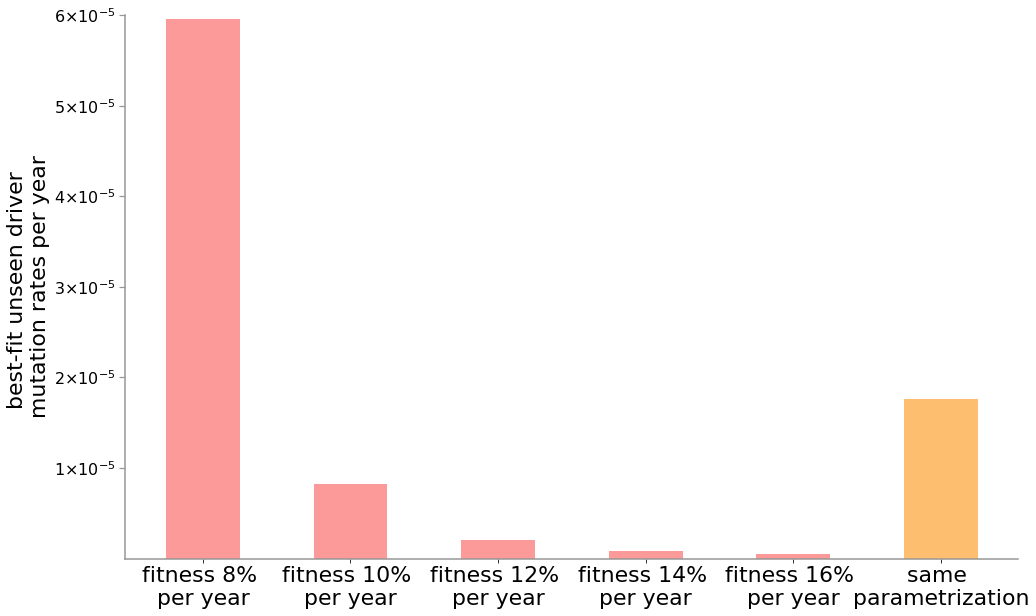

In [117]:
# plotting the figure
import numpy as np
import matplotlib.pyplot as plt
plt.close()
f, ax1 = plt.subplots(figsize=(16,10))

FETfontsize = 22

best_fit_unseen_driver_rates=[5.953124999999864e-05, 8.232421874998504e-06, 2.0361328124984872e-06, 8.605957031234843e-07,5.191040039047335e-07,0]
best_fit_unseen_driver_rates_complement=[0, 0, 0, 0, 0, 1.76e-05]
p1=ax1.bar(np.arange(6), best_fit_unseen_driver_rates, width=0.5, color='#fb9a99')
p1=ax1.bar(np.arange(6), best_fit_unseen_driver_rates_complement, bottom = best_fit_unseen_driver_rates, width=0.5, color='#fdbf6f')
plt.xticks(np.arange(6), ('fitness 8% \nper year','fitness 10% \nper year', 'fitness 12% \nper year',\
                          'fitness 14% \nper year', 'fitness 16% \nper year','same \nparametrization'), fontsize=FETfontsize)

y_major_ticks=[1*10**-5, 2*10**-5, 3*10**-5, 4*10**-5, 5*10**-5, 6*10**-5]
y_major_tick_labels=[r'1$\times10^{-5}$', r'2$\times10^{-5}$',r'3$\times10^{-5}$',r'4$\times10^{-5}$',r'5$\times10^{-5}$',r'6$\times10^{-5}$']
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize=16)
ax1.yaxis.set_tick_params(width=1.2, color = grey3, length = 6)
ax1.set_ylabel('best-fit unseen driver \nmutation rates per year', fontsize=FETfontsize)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)


    
# plt.savefig('unseen_DFE_across_6_cases.pdf',bbox_inches='tight')


In [108]:
# Choose one of the following blocks to run
top_291_genes_nonsyn_seen_mu = 7.726088971074757e-06  
best_fit_haploid_driver_rate_blood = 2.531249999999855e-05

# unseen_driver_fitness =  0.16
# best_fit_unseen_discrete_driver_mut_rate = 5.191040039047335e-07

unseen_driver_fitness =  0.14
best_fit_unseen_discrete_driver_mut_rate = 8.605957031234843e-07

# unseen_driver_fitness =  0.12
# best_fit_unseen_discrete_driver_mut_rate = 2.0361328124984872e-06

# unseen_driver_fitness =  0.1
# best_fit_unseen_discrete_driver_mut_rate = 8.232421874998504e-06

# unseen_driver_fitness =  0.08
# best_fit_unseen_discrete_driver_mut_rate = 5.953124999999864e-05


 Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  1  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 after excluding singletons Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  0  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 Razavi 2019 hist: [18 20 10  9  6  3  1  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792  -3.16314119 -2.75430318 -2.34546517]

 after excluding singletons Razavi 2019 hist: [18 20 10  9  6  3  0  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792 

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:239: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encoun

hitchhiker_y_best_fit_Bolton best_fit_u_shift_to_left [6.095721527176007, 5.979616643489178, 5.863114439461113, 5.746209377340547, 5.628898088874194, 5.511178862273408, 5.393050941053757, 5.274513687063596, 5.155565663409571, 5.036203698305791, 4.916421999742233, 4.796211379997953, 4.675558616810515, 4.55443878712453, 4.43283543431467, 4.310732399590798, 4.188087820164887, 4.064864401031536, 3.9410200325615237, 3.8165073779702414, 3.691274408313386, 3.5652596213104366, 3.438399620901142, 3.3106195674873393, 3.181835878533593, 3.051953511377059, 2.9208634892611003, 2.7884398099678203, 2.654535459390754, 2.518977500515649, 2.3815599680668598, 2.242035497736624, 2.1001032938710225, 1.9553930676852602, 1.807442711998916, 1.6556667099071098, 1.4993103745242964, 1.3373818750058308, 1.1685482240030212, 0.9909705424482971, 0.8020324016307883, 0.5978697557314927, 0.3725083273440384, 0.11616113041651045, -0.18846083441412975, -0.5752062422936157, -1.1210242858035697, -2.0485165893127895, -4.3980

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log


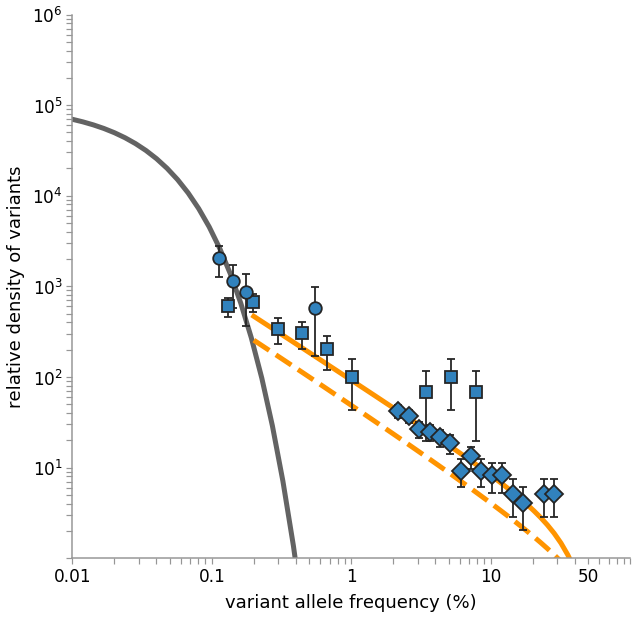

In [110]:
#Plotting the histogram 

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

Boltonmarker='D'
Razavimarker='s'
Youngmarker= 'o'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9
Youngmarkersize = m_size*0.9

def SuperScriptinate(number):
    return number.replace('0','⁰').replace('1','¹').replace('2','²').replace('3','³').replace('4','⁴').replace('5','⁵').replace('6','⁶').replace('7','⁷').replace('8','⁸').replace('9','⁹').replace('-','⁻')

def sci_notation(number, sig_fig):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a,b = ret_string.split("e")
    b = int(b)         # removed leading "+" and strips leading zeros too.
    return a + "x10^" + SuperScriptinate(str(b))


#Synoymous variants (all genes)
Bolton_synonymous_bins = 16
plot_log_hist_data_exclude_singletons(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins, \
                            'Bolton 2020', Boltonmarker, Boltonmarkersize, blue4)
Razavi_synonymous_bins = 11
plot_log_hist_data_exclude_singletons(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins, \
                            'Razavi 2019', Razavimarker, Razavimarkersize, blue4)
Young_synonymous_bins = 9
plot_log_hist_data_exclude_singletons(Young_synonymous_trimmed_list, Youngtotal, Young_synonymous_mu, Young_synonymous_bins, \
                            'Young 2016 & 2019', Youngmarker, Youngmarkersize, blue4)


x=np.linspace(np.log(10**-4), np.log(0.4999), 50)
x_passenger=np.linspace(np.log(phi), np.log(0.4999), 50)

neutral_single_y_Bolton=[logProbtheory_actual_ages_drift(l, N_tau, list_of_Bolton_ages) for l in x]
ax1.plot(x, neutral_single_y_Bolton, zorder=0, c = grey4, lw = 5, label= 'neutral drift')

hitchhiker_y_fixed_Bolton = [hitchhiker_y_best_fit_Bolton[i]+np.log(top_291_genes_nonsyn_seen_mu/best_fit_haploid_driver_rate_blood) for i in range(len(hitchhiker_y_best_fit_Bolton))]
print('hitchhiker_y_best_fit_Bolton best_fit_u_shift_to_left', hitchhiker_y_best_fit_Bolton)
# print('len(hitchhiker_y_fixed_Bolton)', len(hitchhiker_y_fixed_Bolton))

hitchhiker_y_best_fit_unseen_contrib=[logProbtheory_actual_ages_hitch_discrete(l, unseen_driver_fitness, best_fit_unseen_discrete_driver_mut_rate, N_tau, list_of_Bolton_ages) for l in x_passenger]
# print('s = 10%, hitchhiker_y_best_fit_unseen_contrib', hitchhiker_y_best_fit_unseen_contrib)

early_developmentals_y=[logProbtheory_ages_dev(l, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu) for l in x_passenger]
# ax1.plot(x_passenger, early_developmentals_y, c = green3, lw = 4, label= 'dev. mutations')
# print('len(early_developmentals_y)', len(early_developmentals_y))

early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_fixed_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_fixed, c = c3, lw = 5, linestyle='--',  label= 'dev. mutations +\npassengers \n(all nonsyn SNV. \n from Bolton 2020)')

early_developmentals_and_hitchhiker_best_fit=[np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_fixed_Bolton[i])+np.exp(hitchhiker_y_best_fit_unseen_contrib[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_best_fit, c = c3, lw = 5, label= 'best-fit')


# plt.savefig('Passenger_prediction_seen_drivers_on_DFE_vs_unseen_drivers_discrete_14p_fitness.pdf',bbox_inches='tight')

plt.show()


# Fraction of missing positive selection

In [27]:
# p = 3
best_fit_haploid_driver_rate_blood =  2.531249999999855e-05
top_291_genes_nonsyn_seen_mu = 7.726088971074757e-06  
# best-fit rate if no dev contrib
total_amplitude = 3.621093749999858e-05

# # p = 4
# best_fit_haploid_driver_rate_blood = 4.54687499999986e-05
# top_291_genes_nonsyn_seen_mu = 1.4263548869678495e-05
# # best-fit rate if no dev contrib
# total_amplitude = 6.650390624999867e-05

# # # p = 5
# best_fit_haploid_driver_rate_blood =  6.515624999999865e-05
# top_291_genes_nonsyn_seen_mu = 2.0919871675529572e-05
# # best-fit rate if no dev contrib
# total_amplitude = 9.726562499999873e-05

In [28]:
dev_contrib_original = total_amplitude-best_fit_haploid_driver_rate_blood
print('original dev contrib (in mutation rates for DFE):', dev_contrib_original)
dev_contrib_upper_bound = (total_amplitude-best_fit_haploid_driver_rate_blood)*1.5
dev_contrib_lower_bound = (total_amplitude-best_fit_haploid_driver_rate_blood)*0.5
print('upper bound for dev contrib (in mutation rates for DFE):', dev_contrib_upper_bound)
print('lower bound for dev contrib (in mutation rates for DFE):', dev_contrib_lower_bound)
best_fit_haploid_driver_rate_blood_lower_bound = total_amplitude - dev_contrib_upper_bound
best_fit_haploid_driver_rate_blood_upper_bound = total_amplitude - dev_contrib_lower_bound
print('Hence, the new best_fit_haploid_driver_rate_blood_lower_bound', best_fit_haploid_driver_rate_blood_lower_bound)
print('and, the new best_fit_haploid_driver_rate_blood_upper_bound', best_fit_haploid_driver_rate_blood_upper_bound)
print('compared to the original', best_fit_haploid_driver_rate_blood)
fraction_of_explained_positive_selection_lower_bound =\
(top_291_genes_nonsyn_seen_mu)/best_fit_haploid_driver_rate_blood_upper_bound
fraction_of_explained_positive_selection_upper_bound =\
(top_291_genes_nonsyn_seen_mu)/best_fit_haploid_driver_rate_blood_lower_bound

original dev contrib (in mutation rates for DFE): 1.089843750000003e-05
upper bound for dev contrib (in mutation rates for DFE): 1.6347656250000045e-05
lower bound for dev contrib (in mutation rates for DFE): 5.449218750000015e-06
Hence, the new best_fit_haploid_driver_rate_blood_lower_bound 1.9863281249998533e-05
and, the new best_fit_haploid_driver_rate_blood_upper_bound 3.0761718749998564e-05
compared to the original 2.531249999999855e-05


In [29]:
print('fraction of high VAF synonymous variants that are developmental', dev_contrib_original/total_amplitude)
print('fraction of high VAF synonymous variants that are developmental (upper bound)', dev_contrib_upper_bound/total_amplitude)
print('fraction of high VAF synonymous variants that are developmental (lower bound)', dev_contrib_lower_bound/total_amplitude)

fraction of high VAF synonymous variants that are developmental 0.3009708737864204
fraction of high VAF synonymous variants that are developmental (upper bound) 0.4514563106796306
fraction of high VAF synonymous variants that are developmental (lower bound) 0.1504854368932102


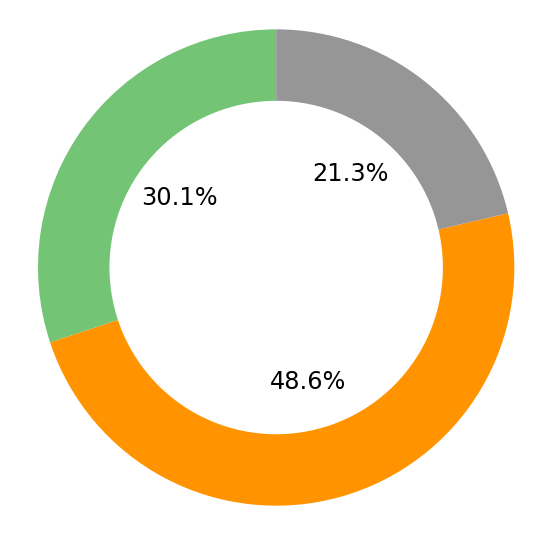

In [43]:
# this requires input of parameters
import matplotlib.pyplot as plt
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(8*scale, 8*scale))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'developmental', 'unexplained\npositive selection', 'explained\npositive selection'
labels = ' ', ' ', ' '

# fitted from 10 gene (dev and HH contrib included, imposed 3.5% s)
top_10_genes_nonsyn_seen_mu = 4.763340425531794e-06 
top_291_genes_nonsyn_seen_mu = 7.726088971074757e-06  
best_fit_haploid_driver_rate_blood = 2.531249999999855e-05
total_amplitude = 3.621093749999858e-05
# sizes = [total_amplitude-best_fit_haploid_driver_rate_blood, best_fit_haploid_driver_rate_blood-top_10_genes_nonsyn_seen_mu, top_10_genes_nonsyn_seen_mu]

sizes = [total_amplitude-best_fit_haploid_driver_rate_blood, \
         best_fit_haploid_driver_rate_blood-top_291_genes_nonsyn_seen_mu, top_291_genes_nonsyn_seen_mu]

sizes = [c/sum(sizes)*100 for c in sizes]

# explode = (0.05,0.05,0.05)
explode = (0, 0, 0)  


colors = [green3, c3, grey3]

patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.5,
        labeldistance = 1.1, shadow=False, startangle=90, colors = colors)
for i in [0,1,2]:
    texts[i].set_fontsize(24)
    autotexts[i].set_fontsize(24)

# Add a circle to make a torus
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig('Pie_chart_driver_analysis_dev_and_HH_contrib_top_10_genes_p_is_3.pdf', bbox_inches='tight')
plt.show()

## plotting the cumulative graphs (figure S8)

In [24]:
# N tau = 10^5 (based on inferred dev. mut rate from Lee Six et al.)

# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
best_fit_nonsyn_driver_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes[1] =  2.860409574468083e-06
best_fit_nonsyn_driver_rate_top_x_genes[3] =  3.7821053856383055e-06 
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.119377493351005e-06  
best_fit_nonsyn_driver_rate_top_x_genes[10] =  4.763340425531794e-06 
best_fit_nonsyn_driver_rate_top_x_genes[20] = 5.309052734375117e-06  
best_fit_nonsyn_driver_rate_top_x_genes[30] = 5.582933344415052e-06  
best_fit_nonsyn_driver_rate_top_x_genes[50] =  6.178623296209841e-06 
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.983210605054371e-06  
best_fit_nonsyn_driver_rate_top_x_genes[291] = 7.726088971074757e-06  
# best_fit_nonsyn_driver_rate_top_x_genes[468] = 7.3839245449640775e-06

total_nonsyn_rate_top_x_genes = {}
total_nonsyn_rate_top_x_genes[1] =  3.690851063829787e-06
total_nonsyn_rate_top_x_genes[3] =  1.4322765957446808e-05 
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05  
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
total_nonsyn_rate_top_x_genes[20] =  0.0001156695744680851 
total_nonsyn_rate_top_x_genes[30] = 0.00021095659574468085  
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874  
total_nonsyn_rate_top_x_genes[100] =  0.0006218093617021276 
total_nonsyn_rate_top_x_genes[291] =  0.001217156170212766  
# total_nonsyn_rate_top_x_genes[468] =  0.0015352565957446808

best_fit_haploid_driver_rate_blood = 2.531249999999855e-05
best_fit_haploid_driver_rate_blood_v3 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v3panel_size)
best_fit_haploid_driver_rate_blood_v5 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v5panel_size)

Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 = [0]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5 = [0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
    Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5.append(x)
    Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood))
    
lower_err_N_tau_10to5=[0]
upper_err_N_tau_10to5=[0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
#     upper_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v5))
    upper_err_N_tau_10to5.append((0))
    lower_value = (haploid_rate/best_fit_haploid_driver_rate_blood) - (haploid_rate/best_fit_haploid_driver_rate_blood_v3)
    lower_err_N_tau_10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood_v3))

err_N_tau_10to5 = [tuple(lower_err_N_tau_10to5),tuple(upper_err_N_tau_10to5)]

print('Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5', Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5)
print('Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5', Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5)


Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 [0, 1, 3, 5, 10, 20, 30, 50, 100, 291]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5 [0, 0.11300383504072087, 0.14941650906226261, 0.16274083924350582, 0.1881813501444767, 0.20974035493828827, 0.22056032965591596, 0.2440937598502793, 0.2758799251379663, 0.30522820626469926]


In [30]:
# N tau = 10^5 (based on inferred dev. mut rate from Lee Six et al. times 0.5)

# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
best_fit_nonsyn_driver_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes[1] =  2.860409574468083e-06
best_fit_nonsyn_driver_rate_top_x_genes[3] =  3.7821053856383055e-06 
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.119377493351005e-06  
best_fit_nonsyn_driver_rate_top_x_genes[10] =  4.763340425531794e-06 
best_fit_nonsyn_driver_rate_top_x_genes[20] = 5.309052734375117e-06  
best_fit_nonsyn_driver_rate_top_x_genes[30] = 5.582933344415052e-06  
best_fit_nonsyn_driver_rate_top_x_genes[50] =  6.178623296209841e-06 
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.983210605054371e-06  
best_fit_nonsyn_driver_rate_top_x_genes[291] = 7.726088971074757e-06  
# best_fit_nonsyn_driver_rate_top_x_genes[468] = 7.3839245449640775e-06

total_nonsyn_rate_top_x_genes = {}
total_nonsyn_rate_top_x_genes[1] =  3.690851063829787e-06
total_nonsyn_rate_top_x_genes[3] =  1.4322765957446808e-05 
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05  
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
total_nonsyn_rate_top_x_genes[20] =  0.0001156695744680851 
total_nonsyn_rate_top_x_genes[30] = 0.00021095659574468085  
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874  
total_nonsyn_rate_top_x_genes[100] =  0.0006218093617021276 
total_nonsyn_rate_top_x_genes[291] =  0.001217156170212766  
# total_nonsyn_rate_top_x_genes[468] =  0.0015352565957446808

best_fit_haploid_driver_rate_blood = best_fit_haploid_driver_rate_blood_upper_bound
best_fit_haploid_driver_rate_blood_v3 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v3panel_size)
best_fit_haploid_driver_rate_blood_v5 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v5panel_size)

Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 = [0]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound = [0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
    Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5.append(x)
    Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound.append((haploid_rate/best_fit_haploid_driver_rate_blood))
    
# lower_err_N_tau_10to5=[0]
# upper_err_N_tau_10to5=[0]
# for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
# #     upper_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v5))
#     upper_err_N_tau_10to5.append((0))
#     lower_value = (haploid_rate/best_fit_haploid_driver_rate_blood) - (haploid_rate/best_fit_haploid_driver_rate_blood_v3)
#     lower_err_N_tau_10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood_v3))

# err_N_tau_10to5 = [tuple(lower_err_N_tau_10to5),tuple(upper_err_N_tau_10to5)]


print('Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5', Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5)
print('Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound', Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound)


Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 [0, 1, 3, 5, 10, 20, 30, 50, 100, 291]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound [0, 0.09298601283350647, 0.1229484417426605, 0.13391246200608337, 0.15484636811888206, 0.1725863492063611, 0.18148964268829462, 0.20085429381965628, 0.22700976697066697, 0.25115920972637845]


In [31]:
# N tau = 10^5 (based on inferred dev. mut rate from Lee Six et al. times 1.5)

# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
best_fit_nonsyn_driver_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes[1] =  2.860409574468083e-06
best_fit_nonsyn_driver_rate_top_x_genes[3] =  3.7821053856383055e-06 
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.119377493351005e-06  
best_fit_nonsyn_driver_rate_top_x_genes[10] =  4.763340425531794e-06 
best_fit_nonsyn_driver_rate_top_x_genes[20] = 5.309052734375117e-06  
best_fit_nonsyn_driver_rate_top_x_genes[30] = 5.582933344415052e-06  
best_fit_nonsyn_driver_rate_top_x_genes[50] =  6.178623296209841e-06 
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.983210605054371e-06  
best_fit_nonsyn_driver_rate_top_x_genes[291] = 7.726088971074757e-06  
# best_fit_nonsyn_driver_rate_top_x_genes[468] = 7.3839245449640775e-06

total_nonsyn_rate_top_x_genes = {}
total_nonsyn_rate_top_x_genes[1] =  3.690851063829787e-06
total_nonsyn_rate_top_x_genes[3] =  1.4322765957446808e-05 
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05  
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
total_nonsyn_rate_top_x_genes[20] =  0.0001156695744680851 
total_nonsyn_rate_top_x_genes[30] = 0.00021095659574468085  
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874  
total_nonsyn_rate_top_x_genes[100] =  0.0006218093617021276 
total_nonsyn_rate_top_x_genes[291] =  0.001217156170212766  
# total_nonsyn_rate_top_x_genes[468] =  0.0015352565957446808

best_fit_haploid_driver_rate_blood = best_fit_haploid_driver_rate_blood_lower_bound
best_fit_haploid_driver_rate_blood_v3 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v3panel_size)
best_fit_haploid_driver_rate_blood_v5 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v5panel_size)

Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 = [0]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound = [0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
    Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5.append(x)
    Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound.append((haploid_rate/best_fit_haploid_driver_rate_blood))
    
# lower_err_N_tau_10to5=[0]
# upper_err_N_tau_10to5=[0]
# for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
# #     upper_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v5))
#     upper_err_N_tau_10to5.append((0))
#     lower_value = (haploid_rate/best_fit_haploid_driver_rate_blood) - (haploid_rate/best_fit_haploid_driver_rate_blood_v3)
#     lower_err_N_tau_10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood_v3))

# err_N_tau_10to5 = [tuple(lower_err_N_tau_10to5),tuple(upper_err_N_tau_10to5)]


print('Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5', Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5)
print('Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound', Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound)



Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5 [0, 1, 3, 5, 10, 20, 30, 50, 100, 291]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound [0, 0.14400488713154047, 0.19040687880501037, 0.20738655620411703, 0.2398063223080097, 0.26727974434614166, 0.28106803071196834, 0.31105753467646724, 0.35156379840590973, 0.3889633778948444]


In [21]:
# N tau = 2*10**5
# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
total_nonsyn_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes = {}

total_nonsyn_rate_top_x_genes[1] = 3.690851063829787e-06
best_fit_nonsyn_driver_rate_top_x_genes[1] = 2.4913244680851035e-06
total_nonsyn_rate_top_x_genes[3] = 1.4322765957446808e-05 
best_fit_nonsyn_driver_rate_top_x_genes[3] = 3.3009499667553266e-06
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05
best_fit_nonsyn_driver_rate_top_x_genes[5] = 3.595093085106323e-06
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
best_fit_nonsyn_driver_rate_top_x_genes[10] = 4.167922872340303e-06 
total_nonsyn_rate_top_x_genes[20] = 0.0001156695744680851
best_fit_nonsyn_driver_rate_top_x_genes[20] = 4.687780605884425e-06
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874
best_fit_nonsyn_driver_rate_top_x_genes[50] = 5.45751076296516e-06
total_nonsyn_rate_top_x_genes[100] = 0.0006218093617021276
best_fit_nonsyn_driver_rate_top_x_genes[100] = 6.163442403591607e-06
total_nonsyn_rate_top_x_genes[291] = 0.001217156170212766
best_fit_nonsyn_driver_rate_top_x_genes[291] = 6.894048620343373e-06


best_fit_haploid_driver_rate_blood = 2.3378906249998543e-05
best_fit_haploid_driver_rate_blood_v3 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v3panel_size)
best_fit_haploid_driver_rate_blood_v5 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v5panel_size)

Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5 = [0]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5 = [0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
#     print('x',x)
    Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5.append(x)
    Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood))
    
# lower_err_N_tau_2times10to5=[0]
# upper_err_N_tau_2times10to5=[0]
# for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
# #     upper_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v5))
#     upper_err_N_tau_2times10to5.append((0))
#     lower_value = (haploid_rate/best_fit_haploid_driver_rate_blood) - (haploid_rate/best_fit_haploid_driver_rate_blood_v3)
#     lower_err_N_tau_2times10to5.append((haploid_rate/best_fit_haploid_driver_rate_blood_v3))

# err_N_tau_2times10to5 = [tuple(lower_err_N_tau_2times10to5),tuple(upper_err_N_tau_2times10to5)]

In [22]:
# N tau = 5*10**4
# For driver analysis inclduing dev contrib and HH contrib (accounting for s=0-3.5% as passengers)
total_nonsyn_rate_top_x_genes = {}
best_fit_nonsyn_driver_rate_top_x_genes = {}


total_nonsyn_rate_top_x_genes[1] = 3.690851063829787e-06
best_fit_nonsyn_driver_rate_top_x_genes[1] = 3.402503324468084e-06
total_nonsyn_rate_top_x_genes[3] = 1.4322765957446808e-05
best_fit_nonsyn_driver_rate_top_x_genes[3] = 4.475864361702134e-06
total_nonsyn_rate_top_x_genes[5] = 3.1956382978723404e-05
best_fit_nonsyn_driver_rate_top_x_genes[5] = 4.918287067819092e-06
total_nonsyn_rate_top_x_genes[10] = 4.763340425531915e-05 
best_fit_nonsyn_driver_rate_top_x_genes[10] = 5.6564667553190305e-06
total_nonsyn_rate_top_x_genes[20] = 0.0001156695744680851
best_fit_nonsyn_driver_rate_top_x_genes[20] = 6.257904712433626e-06 
total_nonsyn_rate_top_x_genes[50] = 0.00033564510638297874 
best_fit_nonsyn_driver_rate_top_x_genes[50] = 7.276681017286969e-06
total_nonsyn_rate_top_x_genes[100] = 0.0006218093617021276
best_fit_nonsyn_driver_rate_top_x_genes[100] = 8.136958444150114e-06
total_nonsyn_rate_top_x_genes[291] = 0.001217156170212766 
best_fit_nonsyn_driver_rate_top_x_genes[291] = 9.003865223983671e-06


best_fit_haploid_driver_rate_blood = 2.8242187499998558e-05
best_fit_haploid_driver_rate_blood_v3 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v3panel_size)
best_fit_haploid_driver_rate_blood_v5 = best_fit_haploid_driver_rate_blood*(Bolton_v6panel_size/Bolton_v5panel_size)


Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4 = [0]
Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4 = [0]
for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
    Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4.append(x)
    Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood))
    
# lower_err_N_tau_5times10to4=[0]
# upper_err_N_tau_5times10to4=[0]
# for x, haploid_rate in best_fit_nonsyn_driver_rate_top_x_genes.items():
# #     upper_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v5))
#     upper_err_N_tau_5times10to4.append((0))
#     lower_value = (haploid_rate/best_fit_haploid_driver_rate_blood) - (haploid_rate/best_fit_haploid_driver_rate_blood_v3)
#     lower_err_N_tau_5times10to4.append((haploid_rate/best_fit_haploid_driver_rate_blood_v3))

# err_N_tau_5times10to4 = [tuple(lower_err_N_tau_5times10to4),tuple(upper_err_N_tau_5times10to4)]

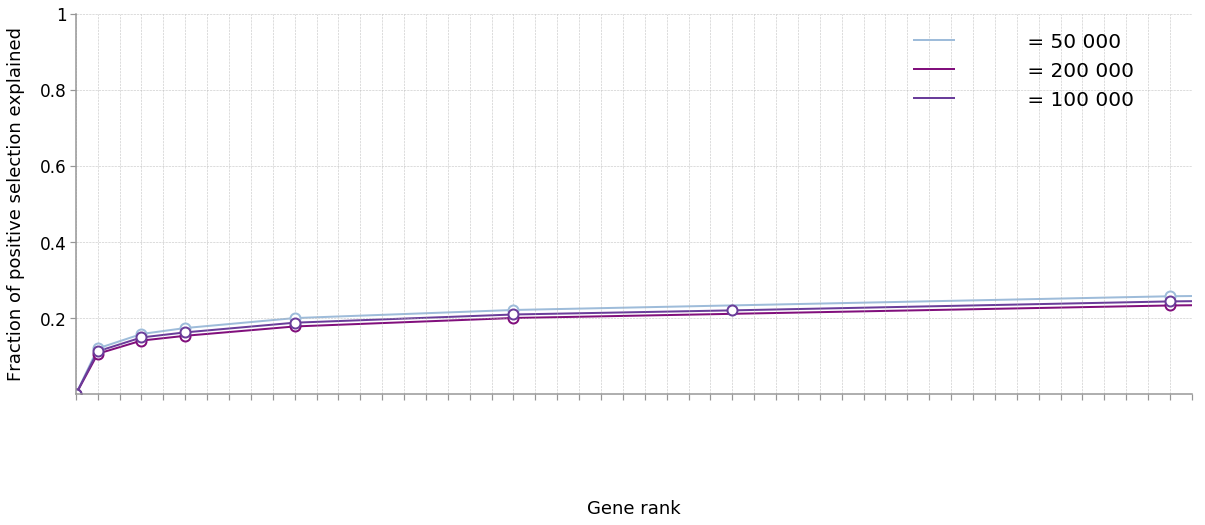

In [152]:
# Plot summary graph (top 50 genes)

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

Martincorena_color = '#00441b'
Bolton_color = '#6a3d9a'
Bolton_color_N_tau_5times10to4 = '#9ebcda'
Bolton_color_N_tau_10to5 = '#8c6bb1'
Bolton_color_N_tau_2times10to5 = '#810f7c'


x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)
# x_major_tick_labels =  np.linspace(0, 51, 52)


ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4, marker='o', edgecolors=Bolton_color_N_tau_5times10to4, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4, color = Bolton_color_N_tau_5times10to4, lw=2, zorder=0, label='         = 50 000')

ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5, marker='o', edgecolors=Bolton_color_N_tau_2times10to5, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5, color = Bolton_color_N_tau_2times10to5, lw=2, zorder=0, label='         = 200 000')

ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5, marker='o', edgecolors=Bolton_color, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5, color = Bolton_color, lw=2, zorder=0, label='         = 100 000')

# ax1.errorbar(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4,\
#              yerr = err_N_tau_5times10to4, fmt = 'o', ecolor = Bolton_color, \
#                  elinewidth = 2, capsize = 5, capthick = 2,\
#              markersize = 10, markeredgewidth = 2, \
#                  markeredgecolor = Bolton_color, markerfacecolor = 'white', zorder=3)
  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =80*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.85, 0.85), frameon=0, fontsize = 20)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_blood_only_different_N_taus.pdf', bbox_inches='tight')


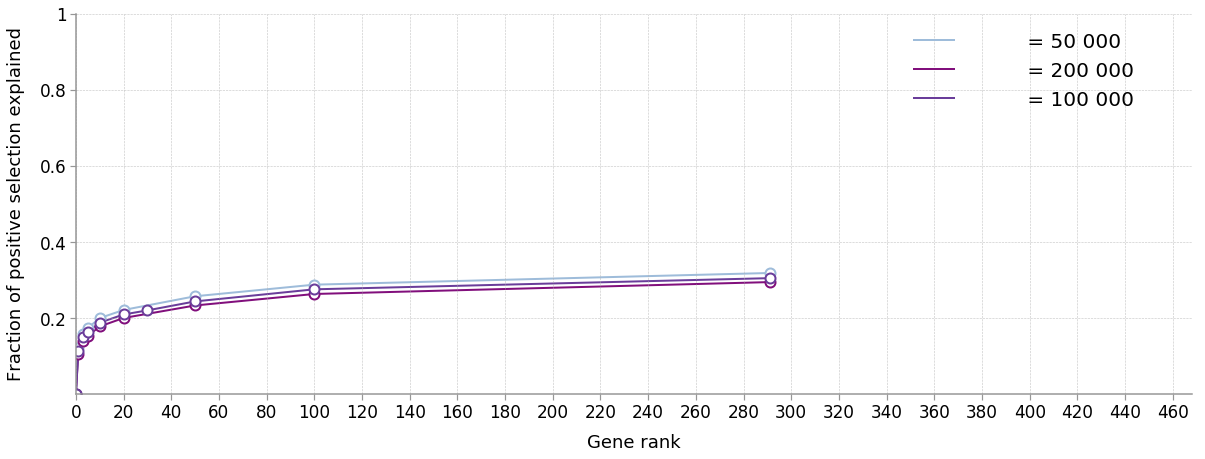

In [229]:
# Plot summary graph (all genes)
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

Martincorena_color = '#00441b'
Bolton_color = '#6a3d9a'
Bolton_color_N_tau_5times10to4 = '#9ebcda'
Bolton_color_N_tau_10to5 = '#8c6bb1'
Bolton_color_N_tau_2times10to5 = '#810f7c'


x_major_ticks =  []
x_major_tick_labels = []
for x in np.linspace(0, 468, 469):
    if x % 20 == 0:
        x_major_tick_labels.append('%s' % int(x))
        x_major_ticks.append(x)

ax1.set_xlim(0, 468)
# x_major_tick_labels =  np.linspace(0, 51, 52)


ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4, marker='o', edgecolors=Bolton_color_N_tau_5times10to4, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4, color = Bolton_color_N_tau_5times10to4, lw=2, zorder=0, label='         = 50 000')

ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5, marker='o', edgecolors=Bolton_color_N_tau_2times10to5, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_2times10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_2times10to5, color = Bolton_color_N_tau_2times10to5, lw=2, zorder=0, label='         = 200 000')

ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5, marker='o', edgecolors=Bolton_color, color='white', s=100, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5, color = Bolton_color, lw=2, zorder=0, label='         = 100 000')

# ax1.errorbar(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4,\
#              yerr = err_N_tau_5times10to4, fmt = 'o', ecolor = Bolton_color, \
#                  elinewidth = 2, capsize = 5, capthick = 2,\
#              markersize = 10, markeredgewidth = 2, \
#                  markeredgecolor = Bolton_color, markerfacecolor = 'white', zorder=3)
  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =10*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.85, 0.85), frameon=0, fontsize = 20)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_all_468_genes_blood_only_different_N_taus.pdf', bbox_inches='tight')


## Figure 6

Plot Martincorena data as well (N $\tau$ = 7790)

In [32]:
# import results
fold_increase_top_x_gene = {1: 2.47834869, 2: 1.83491623, 3: 1.7139959, 4:1.60042694, 5:1.51759293,\
                            6: 1.50167099, 7: 1.49456863, 8: 1.48703827, 9: 1.46572861, 10: 1.4530777}
fold_increase_top_10_genes_discrete = fold_increase_top_x_gene[10]
total_amplitude_in_units_of_top_10_contrib = 1.58667747
fraction_of_dev_among_syn_var_density = (total_amplitude_in_units_of_top_10_contrib-fold_increase_top_10_genes_discrete)/total_amplitude_in_units_of_top_10_contrib
print('fraction_of_dev_among_syn_var_density', fraction_of_dev_among_syn_var_density)
fraction_of_dev_among_syn_var_density_upper_bound = fraction_of_dev_among_syn_var_density*1.5
fraction_of_dev_among_syn_var_density_lower_bound = fraction_of_dev_among_syn_var_density*0.5
print('fraction_of_dev_among_syn_var_density_upper_bound ', fraction_of_dev_among_syn_var_density_upper_bound )
print('fraction_of_dev_among_syn_var_density_lower_bound', fraction_of_dev_among_syn_var_density_lower_bound)

top_x_from_11th_gene_best_fit_nonsyn_driver_rate = {10: 1e-05, 15: 1.4125000000000011e-05, 20: 2.650000000000004e-05, 25: 3.0000000000000045e-05, 30: 3.3500000000000055e-05, 35: 3.9500000000000066e-05, 40: 4.250000000000007e-05, 45: 4.5750000000000075e-05, 50: 4.7500000000000084e-05, 55: 4.925000000000009e-05, 60: 5.0500000000000096e-05, 65: 5.22500000000001e-05, 70: 5.22500000000001e-05, 74: 5.2750000000000096e-05}

best_fit_haploid_from_11th = 8.24999999999987e-05
fraction_of_top_10_passengers_among_syn_var_density = 1/total_amplitude_in_units_of_top_10_contrib
print('fraction_of_top_10_passengers_among_syn_var_density', fraction_of_top_10_passengers_among_syn_var_density)
fraction_of_11th_onwards_passengers_among_syn_var_density = 1 - fraction_of_top_10_passengers_among_syn_var_density-fraction_of_dev_among_syn_var_density
fraction_of_11th_onwards_passengers_among_syn_var_density_upper_bound = 1 - fraction_of_top_10_passengers_among_syn_var_density-fraction_of_dev_among_syn_var_density_lower_bound
fraction_of_11th_onwards_passengers_among_syn_var_density_lower_bound = 1 - fraction_of_top_10_passengers_among_syn_var_density-fraction_of_dev_among_syn_var_density_upper_bound
print('\nfraction_of_11th_onwards_passengers_among_syn_var_density', fraction_of_11th_onwards_passengers_among_syn_var_density)
print('fraction_of_11th_onwards_passengers_among_syn_var_density_upper_bound', fraction_of_11th_onwards_passengers_among_syn_var_density_upper_bound)
print('fraction_of_11th_onwards_passengers_among_syn_var_density_lower_bound', fraction_of_11th_onwards_passengers_among_syn_var_density_lower_bound)

best_fit_haploid_from_11th_lower_bound = best_fit_haploid_from_11th*fraction_of_11th_onwards_passengers_among_syn_var_density_lower_bound/fraction_of_11th_onwards_passengers_among_syn_var_density
best_fit_haploid_from_11th_upper_bound = best_fit_haploid_from_11th*fraction_of_11th_onwards_passengers_among_syn_var_density_upper_bound/fraction_of_11th_onwards_passengers_among_syn_var_density
print('best_fit_haploid_from_11th_lower_bound', best_fit_haploid_from_11th_lower_bound)
print('best_fit_haploid_from_11th_upper_bound', best_fit_haploid_from_11th_upper_bound)


fraction_of_dev_among_syn_var_density 0.0842009624047917
fraction_of_dev_among_syn_var_density_upper_bound  0.12630144360718756
fraction_of_dev_among_syn_var_density_lower_bound 0.04210048120239585
fraction_of_top_10_passengers_among_syn_var_density 0.6302478095942209

fraction_of_11th_onwards_passengers_among_syn_var_density 0.2855512280009874
fraction_of_11th_onwards_passengers_among_syn_var_density_upper_bound 0.32765170920338327
fraction_of_11th_onwards_passengers_among_syn_var_density_lower_bound 0.24345074679859155
best_fit_haploid_from_11th_lower_bound 7.033654434437953e-05
best_fit_haploid_from_11th_upper_bound 9.466345565561785e-05


In [33]:
# (with bounds) p = 3, d = 0.1

fraction_of_positive_selection_explained_by_top_10 = 1/fold_increase_top_10_genes_discrete

passenger_contribution_x_combined_DFE = [0]
passenger_contribution_y_combined_DFE = [0]
passenger_contribution_y_combined_DFE_upper_bound = [0]
passenger_contribution_y_combined_DFE_lower_bound = [0]
for y, fold_increase in fold_increase_top_x_gene.items():
    
#     if dev rate is as inferred
#     unexplained_fraction_of_selection = (fold_increase - 1)/fold_increase
    explained_fraction_of_selection = (1)/fold_increase
    
    explained_fraction_of_syn_var_density = explained_fraction_of_selection*(1-fraction_of_dev_among_syn_var_density)
#     unexplained_fraction_of_syn_var_density = unexplained_fraction_of_selection*(1-fraction_of_dev_among_syn_var_density)
#     print('unexplained_fraction_of_syn_var_density', unexplained_fraction_of_syn_var_density)
    unexplained_fraction_of_syn_var_density = (1-fraction_of_dev_among_syn_var_density-explained_fraction_of_syn_var_density)
#     print('unexplained_fraction_of_syn_var_density', unexplained_fraction_of_syn_var_density)
    
#     if dev rate is higher
    explained_fraction_of_syn_var_density = explained_fraction_of_syn_var_density # does not change
    unexplained_fraction_of_syn_var_density_lower_bound = (1-fraction_of_dev_among_syn_var_density_upper_bound-explained_fraction_of_syn_var_density)
    
    
#     if dev rate is lower
    explained_fraction_of_syn_var_density = explained_fraction_of_syn_var_density # does not change
    unexplained_fraction_of_syn_var_density_upper_bound = (1-fraction_of_dev_among_syn_var_density_lower_bound-explained_fraction_of_syn_var_density)
    
    if y !=0:
        passenger_contribution_x_combined_DFE.append(y)
        passenger_contribution_y_combined_DFE.append(explained_fraction_of_syn_var_density/(explained_fraction_of_syn_var_density+unexplained_fraction_of_syn_var_density))
        passenger_contribution_y_combined_DFE_upper_bound.append(explained_fraction_of_syn_var_density/\
                                                                 (explained_fraction_of_syn_var_density+unexplained_fraction_of_syn_var_density_lower_bound))
        passenger_contribution_y_combined_DFE_lower_bound.append(explained_fraction_of_syn_var_density/\
                                                         (explained_fraction_of_syn_var_density+unexplained_fraction_of_syn_var_density_upper_bound))


for x, best_fit_rate in top_x_from_11th_gene_best_fit_nonsyn_driver_rate.items():
    if x!=10:
        passenger_contribution_x_combined_DFE.append(x)
        
        fraction_of_positive_selection_explained_by_top_10 = fraction_of_top_10_passengers_among_syn_var_density/(1-fraction_of_dev_among_syn_var_density)
        fraction = fraction_of_positive_selection_explained_by_top_10 + (1-fraction_of_positive_selection_explained_by_top_10)*best_fit_rate/best_fit_haploid_from_11th
        
        fraction_of_positive_selection_explained_by_top_10_upper_bound = fraction_of_top_10_passengers_among_syn_var_density/(1-fraction_of_dev_among_syn_var_density_upper_bound)
        upper_fraction = fraction_of_positive_selection_explained_by_top_10_upper_bound +\
        (1-fraction_of_positive_selection_explained_by_top_10)*best_fit_rate/best_fit_haploid_from_11th_lower_bound
        
        fraction_of_positive_selection_explained_by_top_10_lower_bound = fraction_of_top_10_passengers_among_syn_var_density/(1-fraction_of_dev_among_syn_var_density_lower_bound)
        lower_fraction = fraction_of_positive_selection_explained_by_top_10_lower_bound +\
        (1-fraction_of_positive_selection_explained_by_top_10)*best_fit_rate/best_fit_haploid_from_11th_upper_bound
        
        passenger_contribution_y_combined_DFE.append(fraction)
        passenger_contribution_y_combined_DFE_upper_bound.append(upper_fraction)
        passenger_contribution_y_combined_DFE_lower_bound.append(lower_fraction)
        

print('passenger_contribution_y_combined_DFE', passenger_contribution_y_combined_DFE)
print('passenger_contribution_y_combined_DFE_upper_bound', passenger_contribution_y_combined_DFE_upper_bound)
print('passenger_contribution_y_combined_DFE_lower_bound', passenger_contribution_y_combined_DFE_lower_bound)


passenger_contribution_y_combined_DFE [0, 0.4034944735722398, 0.5449840072535628, 0.5834319673693502, 0.6248332710520357, 0.6589382305569913, 0.6659248308446046, 0.6690893813287117, 0.6724776491461784, 0.6822545409685357, 0.6881944441099055, 0.7415793347395742, 0.7883501681230891, 0.8015782826153964, 0.8148063971077038, 0.8374831648088019, 0.848821548659351, 0.8611047978307791, 0.8677188550769328, 0.8743329123230865, 0.8790572389274819, 0.8856712961736355, 0.8856712961736355, 0.8875610268153937]
passenger_contribution_y_combined_DFE_upper_bound [0, 0.4229374626622449, 0.5712448826837717, 0.6115455156811628, 0.6549418035545556, 0.6906901619137739, 0.6980134220618449, 0.7013304611785534, 0.7048819977853686, 0.7151300038694738, 0.7213561301924174, 0.783972989152443, 0.8388320071793679, 0.8543476890455689, 0.86986337091177, 0.8964616826824002, 0.9097608385677154, 0.9241682574434734, 0.931926098376574, 0.9396839393096745, 0.9452252542618892, 0.9529830951949897, 0.9529830951949897, 0.9551996

In [34]:
print('passenger_contribution_y_combined_DFE', passenger_contribution_y_combined_DFE)
print('passenger_contribution_x_combined_DFE', passenger_contribution_x_combined_DFE)

passenger_contribution_y_combined_DFE [0, 0.4034944735722398, 0.5449840072535628, 0.5834319673693502, 0.6248332710520357, 0.6589382305569913, 0.6659248308446046, 0.6690893813287117, 0.6724776491461784, 0.6822545409685357, 0.6881944441099055, 0.7415793347395742, 0.7883501681230891, 0.8015782826153964, 0.8148063971077038, 0.8374831648088019, 0.848821548659351, 0.8611047978307791, 0.8677188550769328, 0.8743329123230865, 0.8790572389274819, 0.8856712961736355, 0.8856712961736355, 0.8875610268153937]
passenger_contribution_x_combined_DFE [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 74]


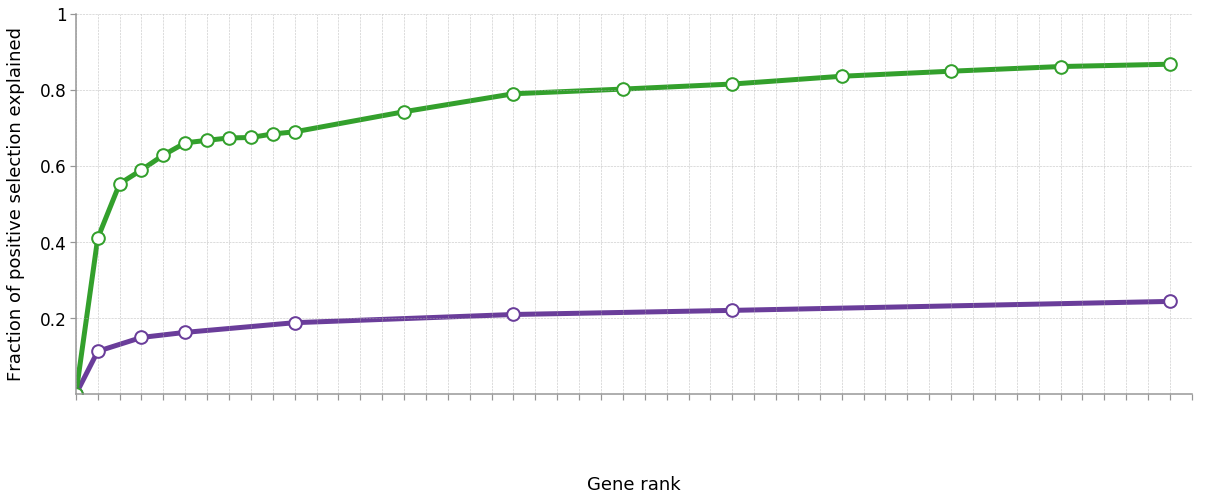

In [28]:
# Plot summary graph

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

# Martincorena_color = '#00441b'
Martincorena_color = '#33a02c'
Bolton_color = '#6a3d9a'

x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], marker='o', edgecolors=Bolton_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], color = Bolton_color, lw=5, zorder=0, label='Bolton')

ax1.scatter(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], marker='o', edgecolors=Martincorena_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], color = Martincorena_color, lw=5, zorder=0, label='oesophagus')


# ax1.errorbar(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4,\
#              yerr = err_N_tau_5times10to4, fmt = 'o', ecolor = Bolton_color, \
#                  elinewidth = 2, capsize = 5, capthick = 2,\
#              markersize = 10, markeredgewidth = 2, \
#                  markeredgecolor = Bolton_color, markerfacecolor = 'white', zorder=3)
  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =60*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.8, 0.6), frameon=0, fontsize = 14)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_blood_and_oesophagus.pdf', bbox_inches='tight')


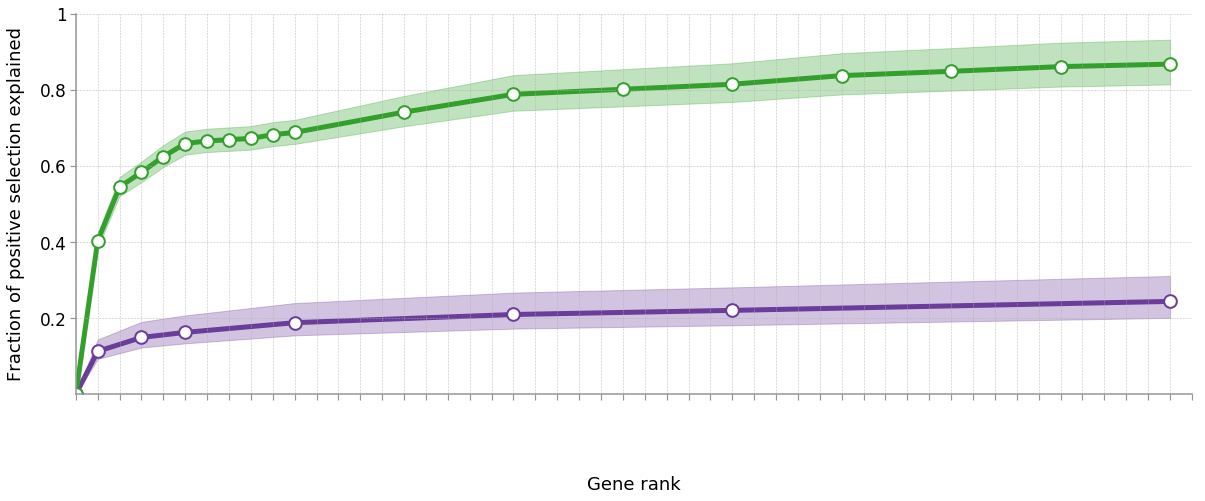

In [58]:
# (with bounds) Plot summary graph

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

# Martincorena_color = '#00441b'
Martincorena_color = '#33a02c'
Bolton_color = '#6a3d9a'

x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], marker='o', edgecolors=Bolton_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], color = Bolton_color, lw=5, zorder=0, label='Bolton')

ax1.fill_between(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8],\
                 Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound[0:8],\
                 y2=Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound[0:8], \
                color = Bolton_color, alpha = 0.3)

ax1.scatter(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], marker='o', edgecolors=Martincorena_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], color = Martincorena_color, lw=5, zorder=0, label='oesophagus')

ax1.fill_between(passenger_contribution_x_combined_DFE[0:19],\
                 passenger_contribution_y_combined_DFE_lower_bound[0:19],\
                 y2=passenger_contribution_y_combined_DFE_upper_bound[0:19], \
                color = Martincorena_color, alpha = 0.3)

# ax1.errorbar(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4,\
#              yerr = err_N_tau_5times10to4, fmt = 'o', ecolor = Bolton_color, \
#                  elinewidth = 2, capsize = 5, capthick = 2,\
#              markersize = 10, markeredgewidth = 2, \
#                  markeredgecolor = Bolton_color, markerfacecolor = 'white', zorder=3)
  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =60*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.8, 0.6), frameon=0, fontsize = 14)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_blood_and_oesophagus.pdf', bbox_inches='tight')


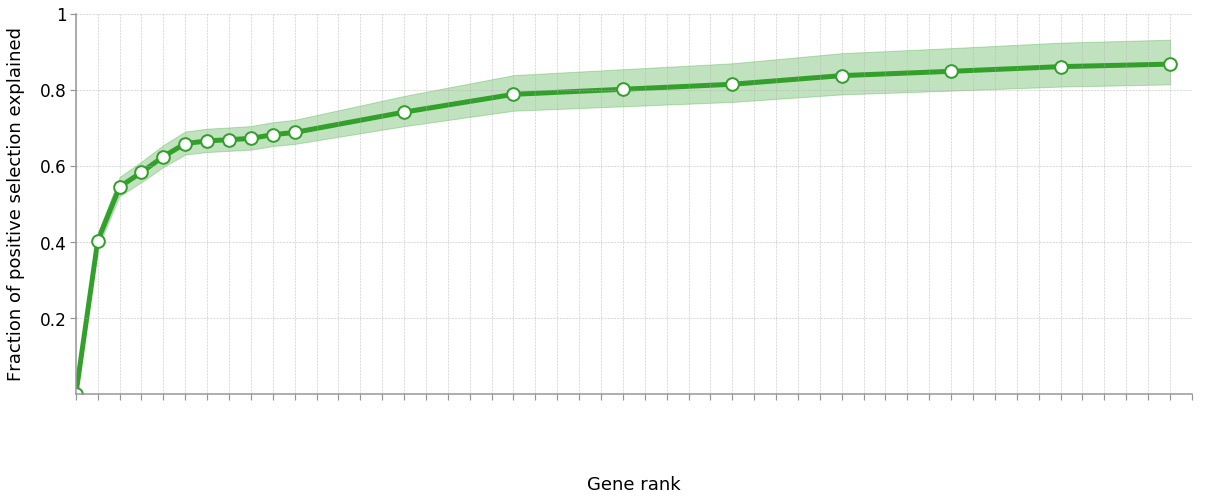

In [41]:
# (with bounds) Plot summary graph

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(20,7))

axisfont = 16.8
scale = 1.2

# Martincorena_color = '#00441b'
Martincorena_color = '#33a02c'
Bolton_color = '#6a3d9a'

x_major_ticks =  np.linspace(0, 51, 52)
x_major_tick_labels = []
for x in x_major_ticks:
    x_major_tick_labels.append('')
ax1.set_xlim(0, 51)

ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks =  [0.2, 0.4, 0.6, 0.8, 1]
y_major_tick_labels =  ['0.2', '0.4', '0.6', '0.8', '1' ]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)


ax1.set_ylim(0, 1)
# ax1.scatter(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], marker='o', edgecolors=Bolton_color, color='white', s=160, zorder=2, linewidth=2)
# ax1.plot(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8], Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5[0:8], color = Bolton_color, lw=5, zorder=0, label='Bolton')

# ax1.fill_between(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_10to5[0:8],\
#                  Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_lower_bound[0:8],\
#                  y2=Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_10to5_upper_bound[0:8], \
#                 color = Bolton_color, alpha = 0.3)

ax1.scatter(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], marker='o', edgecolors=Martincorena_color, color='white', s=160, zorder=2, linewidth=2)
ax1.plot(passenger_contribution_x_combined_DFE[0:19], passenger_contribution_y_combined_DFE[0:19], color = Martincorena_color, lw=5, zorder=0, label='oesophagus')

ax1.fill_between(passenger_contribution_x_combined_DFE[0:19],\
                 passenger_contribution_y_combined_DFE_lower_bound[0:19],\
                 y2=passenger_contribution_y_combined_DFE_upper_bound[0:19], \
                color = Martincorena_color, alpha = 0.3)

# ax1.errorbar(Bolton_passenger_contribution_x_HH_dev_contrib_N_tau_5times10to4, Bolton_passenger_contribution_y_HH_dev_contrib_N_tau_5times10to4,\
#              yerr = err_N_tau_5times10to4, fmt = 'o', ecolor = Bolton_color, \
#                  elinewidth = 2, capsize = 5, capthick = 2,\
#              markersize = 10, markeredgewidth = 2, \
#                  markeredgecolor = Bolton_color, markerfacecolor = 'white', zorder=3)
  

axisfont=14*1.2
axislabelfont=15*1.2
ax1.set_xlabel('Gene rank', fontsize = axislabelfont, labelpad =60*scale, fontweight = 'medium')
ax1.set_ylabel('Fraction of positive selection explained', fontsize = axislabelfont, labelpad = 12*scale, fontweight = 'medium')

#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.8, 0.6), frameon=0, fontsize = 14)
ax1.grid(which='both', linewidth=0.6, alpha = 0.7, zorder = 0, linestyle='--')
    
# plt.savefig('Fraction_of_positive_selection_explained_top_50_oesophagus_only.pdf', bbox_inches='tight')


# Plot VAF spectrum

### fitting the fitness and mutation rate of the top 6 variants 

In [48]:
#  beneficial with cutoff
def Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s):
    return 2*N_tau*u_ben*(1+2*np.exp(l)/(1-2*np.exp(l)))*np.exp(- 2*N_tau*s/(np.exp(s*t)-1)*np.exp(l)/(1-2*np.exp(l))      )

def lin_nonsyn_density_cohort_ages(l, N_tau, u_ben, s, list_of_ages):
        
    predicted_density = 0

    for j in range(len(list_of_ages)):
        t=list_of_ages[j]
        theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
        predicted_density=predicted_density+(theory_binned/len(list_of_ages))

    return predicted_density

def log_nonsyn_density_cohort_ages(l, N_tau, u_ben, s, list_of_ages):
        
    predicted_density = 0

    for j in range(len(list_of_ages)):
        t=list_of_ages[j]
        theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
        predicted_density=predicted_density+(theory_binned/len(list_of_ages))

    return np.log(predicted_density)
    
def squared_distance_calculation_nonsyn_2D_cumulative(params, N_tau, data, list_of_ages, lmin, lmax, n_bins, study_total): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory
    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_ben = params[0]
    
    s = params[1]

    total_square_distance = 0
    
    def linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s):
        
            predicted_density = 0
            
            for j in range(len(list_of_ages)):
                t=list_of_ages[j]
                theory_binned=Predicted_beneficial_with_cutoff(l, N_tau, t, u_ben, s)
                predicted_density=predicted_density+(theory_binned/len(list_of_ages))
                
            return predicted_density
    
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    predicted_cumulative_density = 0
    
    cumulative_data_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        num_data = datapoint[2]

        logfreq = datapoint[0] 

        data_density = datapoint[1]

        cumulative_num_data = cumulative_num_data + num_data


        if data_density!= -(float('inf')):
            
            predicted_cumulative_density = integrate.quad(lambda l: (linear_nonsyn_density_single_s_actual_ages(l, N_tau, u_ben, s)),\
                                     logfreq-bin_size/2, lmax)[0]

            cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

#             if square_distance!=square_distance:
#                 print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density)
           
           
            SD = math.sqrt(cumulative_num_data)/(normed_value) # is not nan
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  # is nan
            
            if sigma_cumulative == sigma_cumulative:

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
#                 total_square_distance = total_square_distance + square_distance
                
            else:
                
                print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))
                total_square_distance = total_square_distance  # do not compute the square distance if there is only one datum

    return total_square_distance

def not_rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))

    normalised_hist = hist/(normed_value)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
    VAF_densities = []
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, hist)
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities



In [57]:
# fit for beneficial mut rate, s for top 6 variants
import scipy


lmin_top20 = np.log(2/100)
lmax_top20 = np.log(0.4999)
n_bins_top20 = 6

top6_best_fit_s = {}
top6_best_fit_u = {}
count = 0
for gene_variant in top_6_variants_in_Bolton:
    
    if True:
    
        list_of_variant_VAF = map_variant_to_VAFs[gene_variant]

        VAF_info_variant_cumulative = not_rescaled_cumulative_VAF_densities_list_simulation_SD(list_of_variant_VAF, Boltontotal, \
                                                                                                n_bins_top20, lmin_top20, lmax_top20)


        print('number of bins set:', n_bins_top20)
#         print('number of nonempty bins:', len(VAF_info_variant_cumulative))


        u_guess=10**-9
        s_guess=0.11


        initial_guess=[u_guess, s_guess]
        outcome=scipy.optimize.minimize(squared_distance_calculation_nonsyn_2D_cumulative, initial_guess, \
                                        args=(N_tau, VAF_info_variant_cumulative, list_of_Bolton_ages,  lmin_top20, lmax_top20, n_bins_top20, Boltontotal), method='Nelder-Mead', \
                                        options={'maxfev':10000000, 'maxiter':1000000})


        print('Success of fitting outcome is', outcome.success)

        print('best-fit values for u_NOTCH1, s:',  outcome.x)

        
        top6_best_fit_u[gene_variant] = outcome.x[0]
        top6_best_fit_s[gene_variant] = outcome.x[1]

        print('\n', gene_variant, 'top6_best_fit_s', top6_best_fit_s[gene_variant], 'top6_best_fit_u', top6_best_fit_u[gene_variant])
        
        
    count = count + 1


bin_centres 5
bin_centres_without_zero 5
number of bins set: 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [8.22726295e-09 1.62369705e-01]

 DNMT3A R882H top6_best_fit_s 0.16236970474305104 top6_best_fit_u 8.227262948654556e-09
bin_centres 5
bin_centres_without_zero 5
number of bins set: 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.69177042e-08 1.20495064e-01]

 JAK2 V617F top6_best_fit_s 0.12049506361759998 top6_best_fit_u 1.691770424187671e-08
bin_centres 5
bin_centres_without_zero 4
number of bins set: 6


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in log


Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [6.28802037e-09 1.61332264e-01]

 DNMT3A R882C top6_best_fit_s 0.1613322643077048 top6_best_fit_u 6.288020372481744e-09
bin_centres 5
bin_centres_without_zero 4
number of bins set: 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.22006339e-08 1.21351154e-01]

 DNMT3A P904L top6_best_fit_s 0.12135115401329552 top6_best_fit_u 1.2200633926647788e-08
bin_centres 5
bin_centres_without_zero 5
number of bins set: 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [1.08446095e-08 1.21259531e-01]

 SF3B1 K700E top6_best_fit_s 0.12125953136464304 top6_best_fit_u 1.0844609452237154e-08
bin_centres 5
bin_centres_without_zero 4
number of bins set: 6
Success of fitting outcome is True
best-fit values for u_NOTCH1, s: [2.54535032e-09 1.76602597e-01]

 SRSF2 P95H top6_best_fit_s 0.1766025966574819 top6_best_fit_u 2.545350319245926e-09


In [43]:
# Stored results
top6_best_fit_u = {'DNMT3A R882H': 8.227262948654556e-09, 'JAK2 V617F': 1.691770424187671e-08, 'DNMT3A R882C': 6.288020372481744e-09, 'DNMT3A P904L': 1.2200633926647788e-08, 'SF3B1 K700E': 1.0844609452237154e-08, 'SRSF2 P95H': 2.545350319245926e-09}

top6_best_fit_s = {'DNMT3A R882H': 0.16236970474305104, 'JAK2 V617F': 0.12049506361759998, 'DNMT3A R882C': 0.1613322643077048, 'DNMT3A P904L': 0.12135115401329552, 'SF3B1 K700E': 0.12125953136464304, 'SRSF2 P95H': 0.1766025966574819}

print('top6_best_fit_u', top6_best_fit_u)
print('top6_best_fit_s', top6_best_fit_s)

top6_best_fit_u {'DNMT3A R882H': 8.227262948654556e-09, 'JAK2 V617F': 1.691770424187671e-08, 'DNMT3A R882C': 6.288020372481744e-09, 'DNMT3A P904L': 1.2200633926647788e-08, 'SF3B1 K700E': 1.0844609452237154e-08, 'SRSF2 P95H': 2.545350319245926e-09}
top6_best_fit_s {'DNMT3A R882H': 0.16236970474305104, 'JAK2 V617F': 0.12049506361759998, 'DNMT3A R882C': 0.1613322643077048, 'DNMT3A P904L': 0.12135115401329552, 'SF3B1 K700E': 0.12125953136464304, 'SRSF2 P95H': 0.1766025966574819}


In [31]:
# this is for plotting subplots
def plot_log_hist_data_for_plot_solid_no_normalization(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color, m, n, scale):

    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1[m][n].errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
    # Set axis limits
    ax1[m][n].set_ylim(np.log(10**-8), np.log(10**-2))
    ax1[m][n].set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
#     ax1[m][n].set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
# #     ax1[m][n].set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
#     ax1[m][n].set_ylabel('density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    
    
    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1[m][n].set_xticks(x_major_ticks)
    ax1[m][n].set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1[m][n].xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_ticks = [c-np.log(10**8) for c in y_major_ticks]
    y_major_tick_labels = ["$10^{-8}$","","", "", "", "", "", "", "", "$10^{-7}$","", "", "", "", "", "", "", "", \
                           "$10^{-6}$","", "", "", "", "", "", "", "", "$10^{-5}$","", "", "", "", "", "", "", "", \
                           "$10^{-4}$","", "", "", "", "", "", "", "", "$10^{-3}$","", "", "", "", "", "", "", "", \
                           "$10^{-2}$"]
    ax1[m][n].set_yticks(y_major_ticks)
    ax1[m][n].set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1[m][n].yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1[m][n].spines['top'].set_visible(False)
    ax1[m][n].spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1[m][n].spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1


plot_log_hist_data_for_plot_solid_no_normalization
beneficial_rescaled_y [-6.421851968880122, -6.421925906897254, -6.422000326385294, -6.42207523179265, -6.42215062761453, -6.4222265183923115, -6.422302908712892, -6.4223798032080275, -6.4224572065536405, -6.422535123469123, -6.422613558716641, -6.422692517100413, -6.4227720034659725, -6.422852022699489, -6.422932579726992, -6.423013679513674, -6.423095327063168, -6.423177527416815, -6.4232602856529715, -6.423343606886289, -6.423427496267023, -6.423511958980364, -6.423597000245735, -6.423682625316168, -6.423768839477631, -6.423855648048425, -6.423943056378551, -6.424031069849126, -6.424119693871823, -6.424208933888306, -6.42429879536969, -6.42438928381605, -6.424480404755932, -6.424572163745875, -6.424664566370002, -6.424757618239581, -6.424851324992666, -6.424945692293723, -6.425040725833319, -6.425136431327804, -6.425232814519055, -6.425329881174251, -6.425427637085637, -6.425526088070367, -6.425625239970376, -6.425725098652255, -6.42

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: inva

beneficial_rescaled_y [-5.706806059159658, -5.706952101755363, -5.707099479702446, -5.707248206917499, -5.707398297452012, -5.7075497654923595, -5.707702625359844, -5.707856891510699, -5.708012578536112, -5.708169701162237, -5.708328274250237, -5.708488312796301, -5.708649831931735, -5.708812846922969, -5.70897737317169, -5.709143426214922, -5.70931102172513, -5.709480175510386, -5.7096509035145155, -5.709823221817296, -5.709997146634662, -5.710172694318962, -5.7103498813592335, -5.710528724381471, -5.7107092401490025, -5.710891445562838, -5.711075357662057, -5.711260993624263, -5.711448370766034, -5.711637506543431, -5.711828418552546, -5.712021124530061, -5.71221564235388, -5.712411990043748, -5.712610185761984, -5.712810247814165, -5.713012194649913, -5.7132160448636915, -5.713421817195648, -5.713629530532486, -5.713839203908388, -5.714050856505966, -5.714264507657269, -5.714480176844786, -5.71469788370252, -5.71491764801712, -5.715139489728969, -5.715363428933409, -5.71558948588188

beneficial_rescaled_y [-6.690745617678047, -6.690820564113117, -6.690896003323069, -6.690971939875313, -6.691048378385001, -6.691125323514473, -6.691202779972569, -6.691280752513953, -6.691359245938477, -6.691438265090464, -6.6915178148580114, -6.69159790017229, -6.691678526006823, -6.691759697376776, -6.691841419338236, -6.691923696987495, -6.6920065354603375, -6.692089939931333, -6.692173915613143, -6.692258467755792, -6.692343601646023, -6.692429322606611, -6.692515635995705, -6.692602547206146, -6.692690061664908, -6.692778184832409, -6.692866922201962, -6.6929562792991595, -6.69304626168135, -6.693136874937076, -6.693228124685558, -6.6933200165762265, -6.693412556288198, -6.693505749529885, -6.693599602038551, -6.6936941195799085, -6.693789307947769, -6.6938851729637, -6.693981720476692, -6.694078956362928, -6.69417688652548, -6.694275516894132, -6.694374853425154, -6.694474902101174, -6.69457566893107, -6.6946771599498325, -6.694779381218565, -6.694882338824424, -6.69498603888066

beneficial_rescaled_y [-6.03348471156502, -6.0336282844442595, -6.033773162427782, -6.033919359085524, -6.034066888118873, -6.034215763360647, -6.034365998775093, -6.034517608457861, -6.034670606636011, -6.034825007667976, -6.034980826043594, -6.035138076384096, -6.035296773442122, -6.035456932101769, -6.035618567378628, -6.035781694419858, -6.035946328504263, -6.036112485042408, -6.03628017957675, -6.036449427781782, -6.036620245464227, -6.036792648563244, -6.036966653150653, -6.03714227543122, -6.037319531742936, -6.037498438557362, -6.037679012479991, -6.03786127025063, -6.038045228743843, -6.038230904969406, -6.0384183160728355, -6.038607479335877, -6.038798412177137, -6.0389911321526535, -6.039185656956551, -6.0393820044217525, -6.0395801925206705, -6.039780239366003, -6.039982163211499, -6.040185982452845, -6.04039171562849, -6.040599381420609, -6.040808998656011, -6.041020586307174, -6.041234163493245, -6.041449749481098, -6.041667363686456, -6.041887025675004, -6.04210875516357

beneficial_rescaled_y [-6.151325041436337, -6.151468875620204, -6.151614018106348, -6.151760482501344, -6.151908282543556, -6.1520574321031605, -6.152207945182121, -6.152359835914187, -6.152513118564881, -6.15266780753149, -6.152823917343073, -6.152981462660471, -6.1531404582763285, -6.15330091911513, -6.153462860233253, -6.153626296819044, -6.153791244192883, -6.153957717807327, -6.154125733247229, -6.1542953062298995, -6.154466452605282, -6.154639188356175, -6.1548135295984725, -6.154989492581428, -6.155167093687966, -6.155346349435, -6.155527276473824, -6.155709891590483, -6.155894211706232, -6.156080253877985, -6.156268035298831, -6.156457573298586, -6.156648885344347, -6.156841989041141, -6.157036902132529, -6.157233642501365, -6.157432228170454, -6.157632677303375, -6.15783500820525, -6.158039239323616, -6.158245389249279, -6.158453476717268, -6.158663520607748, -6.158875539947053, -6.159089553908712, -6.159305581814491, -6.1595236431355165, -6.159743757493407, -6.159965944661454

beneficial_rescaled_y [-7.594014132613798, -7.594076373733758, -7.594138967588684, -7.594201917292129, -7.594265225994008, -7.594328896879945, -7.594392933170585, -7.594457338120879, -7.594522115019337, -7.5945872671873, -7.59465279797817, -7.594718710776607, -7.594785008997776, -7.594851696086533, -7.594918775516618, -7.594986250789854, -7.595054125435341, -7.5951224030086415, -7.5951910870909645, -7.5952601812883715, -7.59532968923097, -7.595399614572118, -7.595469960987632, -7.595540732175005, -7.595611931852645, -7.595683563759089, -7.595755631652302, -7.59582813930888, -7.59590109052337, -7.595974489107551, -7.596048338889742, -7.596122643714123, -7.596197407440088, -7.596272633941594, -7.596348327106555, -7.596424490836235, -7.596501129044668, -7.59657824565812, -7.596655844614534, -7.596733929863037, -7.596812505363464, -7.596891575085878, -7.596971143010161, -7.597051213125596, -7.597131789430499, -7.5972128759318736, -7.597294476645093, -7.5973765955936114, -7.597459236808709,

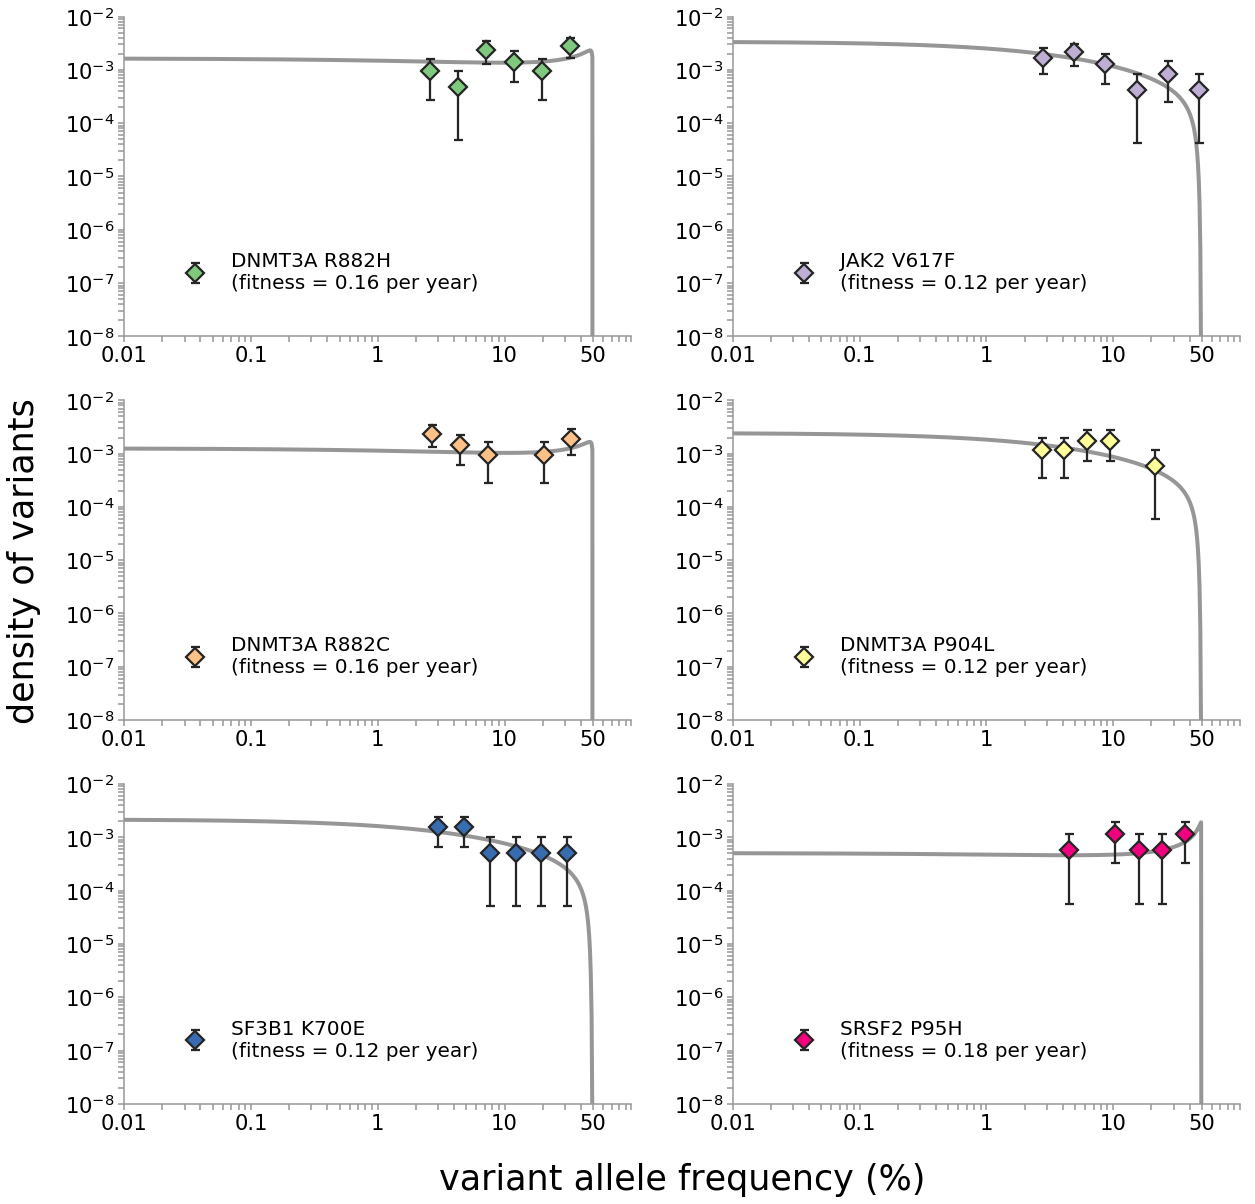

In [86]:
# Plotting synonymous VAF spectra

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(3, 2, sharey=False, sharex=False, figsize=(20, 20))

font = {'weight' : 'normal','size'   : 16}

# import timeit
# start = timeit.default_timer()

Boltonmarker='D'
Razavimarker='s'
Youngmarker= 'o'
AcunaHidalgomarker = '^'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9
Youngmarkersize = m_size*0.9
AcunaHidalgomarkersize = m_size*0.9

Bolton_synonymous_bins = 9

color_list = ['#7fc97f',
'#beaed4',
'#fdc086',
'#ffff99',
'#386cb0',
'#f0027f']

n_bins_top20 = 6

count = 0
m = 0
n = 0
scale = 1.5
x_ben=np.linspace(np.log(10**-4),np.log(0.49999), 600)
for gene_variant in top_6_variants_in_Bolton:
    
    list_of_variant_VAF = map_variant_to_VAFs[gene_variant]

    plot_log_hist_data_for_plot_solid_no_normalization(list_of_variant_VAF, Boltontotal, n_bins_top20,\
                                                       gene_variant + '\n(fitness = %s per year)' % round(top20_best_fit_s[gene_variant],2), Boltonmarker,\
                                                       Boltonmarkersize, color_list[count], m, n, scale)

    beneficial_rescaled_y = [log_nonsyn_density_cohort_ages(l, N_tau, top20_best_fit_u[gene_variant], \
                                                            top20_best_fit_s[gene_variant], list_of_Bolton_ages) for l in x_ben]
    ax1[m][n].plot(x_ben, beneficial_rescaled_y, c = grey3, lw = 4)
    print('beneficial_rescaled_y', beneficial_rescaled_y)

    ax1[m][n].legend(ncol=1, loc='center', bbox_to_anchor=(0.4, 0.2), frameon=0, fontsize = 20)
    

    
    if n < 2:
        n = n + 1
    if n == 2:
        m = m + 1
        n = 0

    count = count + 1

f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('variant allele frequency (%)', fontsize = 35, labelpad = 6*7, fontweight = 'medium')
#     ax1[m][n].set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
plt.ylabel('density of variants', fontsize = 35, labelpad = 6*10, fontweight = 'medium')
    
# plt.savefig('Passenger_prediction_for_Bolton_top_6_variants_with_best_fit.pdf',bbox_inches='tight')

plt.show()


### Plotting the synonymous VAF spectra and nonsynonymous VAF spectra 

### Figure 2A (top 10 genes) 

In [43]:
top_10_genes_nonsyn_seen_mu = 4.763340425531794e-06 
best_fit_haploid_driver_rate_blood = 2.531249999999855e-05


 Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  1  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 after excluding singletons Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  0  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 Razavi 2019 hist: [18 20 10  9  6  3  1  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792  -3.16314119 -2.75430318 -2.34546517]

 after excluding singletons Razavi 2019 hist: [18 20 10  9  6  3  0  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792 

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:239: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


 [11.496819867256429, 11.49605908530688, 11.495257382830724, 11.494412180081756, 11.493520758608252, 11.492580262402672, 11.49158769801895, 11.490539933329375, 11.489433694717428, 11.488265562614108, 11.487031965407137, 11.485729171900552, 11.484353282675052, 11.482900220875933, 11.481365723099357, 11.479745331117934, 11.478034385150053, 11.476228019221788, 11.474321158913671, 11.472308521474597, 11.470184617988272, 11.467943757062285, 11.465580049424068, 11.4630874128632, 11.460459577121833, 11.457690088529612, 11.454772314314289, 11.451699446517862, 11.448464505285033, 11.445060341010262, 11.44147963453466, 11.437714894401086, 11.433758450205598, 11.429602441361562, 11.42523880107462, 11.420659235904274, 11.415855201828231, 11.410817878117172, 11.405538140515844, 11.400006535222625, 11.39421325502825, 11.388148118797229, 11.381800555322872, 11.375159592497107, 11.368213852715833, 11.360951555472383, 11.353360528144528, 11.345428226016319, 11.337141762559455, 11.328487950909025, 11.31

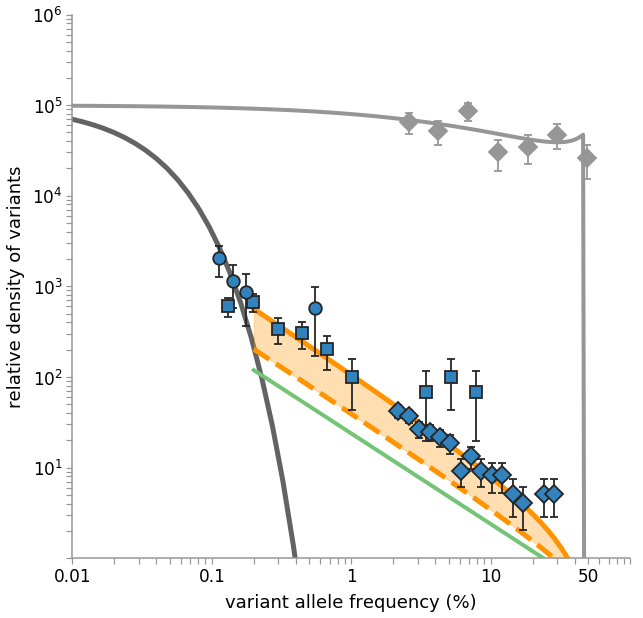

In [240]:
#Plotting the histogram 

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

Boltonmarker='D'
Razavimarker='s'
Youngmarker= 'o'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9
Youngmarkersize = m_size*0.9


#Synoymous variants (all genes)

Bolton_synonymous_bins = 16
plot_log_hist_data_exclude_singletons(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins, \
                            'Bolton 2020', Boltonmarker, Boltonmarkersize, blue4)
Razavi_synonymous_bins = 11
plot_log_hist_data_exclude_singletons(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins, \
                            'Razavi 2019', Razavimarker, Razavimarkersize, blue4)
Young_synonymous_bins = 9
plot_log_hist_data_exclude_singletons(Young_synonymous_trimmed_list, Youngtotal, Young_synonymous_mu, Young_synonymous_bins, \
                            'Young 2016 & 2019', Youngmarker, Youngmarkersize, blue4)



x=np.linspace(np.log(10**-4), np.log(0.4999), 50)
x_passenger=np.linspace(np.log(phi), np.log(0.4999), 50)

neutral_single_y_Bolton=[logProbtheory_actual_ages_drift(l, N_tau, list_of_Bolton_ages) for l in x]
ax1.plot(x, neutral_single_y_Bolton, zorder=0, c = grey4, lw = 5, label= 'neutral drift')

# passenger prediction is based on Bolton data
print('best_fit_haploid_driver_rate_blood', best_fit_haploid_driver_rate_blood)

hitchhiker_y_best_fit_Bolton=[logProbtheory_actual_ages_hitch_DFE(l, [p_inferred, q_inferred, best_fit_haploid_driver_rate_blood], N_tau, s_tolerance, s_max_inferred, list_of_Bolton_ages) for l in x_passenger]
print('hitchhiker_y_best_fit_Bolton based on all 4160 ages', hitchhiker_y_best_fit_Bolton)

hitchhiker_y_best_fit_Bolton=[logProbtheory_actual_ages_hitch_DFE(l, [p_inferred, q_inferred, top_10_genes_nonsyn_seen_mu], N_tau, s_tolerance, s_max_inferred, list_of_Bolton_ages) for l in x_passenger]
print('len(hitchhiker_y_fixed_Bolton)', len(hitchhiker_y_fixed_Bolton))

early_developmentals_y=[logProbtheory_ages_dev(l, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu) for l in x_passenger]
ax1.plot(x_passenger, early_developmentals_y, c = green3, lw = 4, label= 'dev. mutations')
print('len(early_developmentals_y)', len(early_developmentals_y))

early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_fixed_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_fixed, c = c3, lw = 5, linestyle='--',  label= 'dev. mutations +\npassengers \n(all nonsyn SNV. \n from Bolton 2020)')

early_developmentals_and_hitchhiker_best_fit=[np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_best_fit_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_best_fit, c = c3, lw = 5, label= 'best-fit')

ax1.fill_between(x_passenger, early_developmentals_and_hitchhiker_best_fit, y2=early_developmentals_and_hitchhiker_fixed, \
                color = c3, alpha = 0.3, edgecolor = 'white')


# Plotting nonsynonymous VAF spectra
Bolton_nonsynonymous_bins = 7

Bolton_top6variant_mu = 0
list_of_Bolton_top_6_variants_VAF= []
for variant, variant_mut_rate in top6_best_fit_u.items():
    Bolton_top6variant_mu = Bolton_top6variant_mu + variant_mut_rate
    for VAF in map_variant_to_VAFs[variant]:
        list_of_Bolton_top_6_variants_VAF.append(VAF)
    
print('\nBolton_top6variant_mu', Bolton_top6variant_mu)

plot_log_hist_data_for_plot_solid_smaller_greyout(list_of_Bolton_top_6_variants_VAF, Boltontotal, Bolton_top6variant_mu, Bolton_nonsynonymous_bins, \
                        '', Boltonmarker, Boltonmarkersize, grey3)


beneficial_rescaled_y = []
x_ben=np.linspace(np.log(10**-4),np.log(0.49999),100)
for l in x_ben:
    linear_densities_summed_top6variants = 0
#  top6variants_fitness is defined at the end of the notebook under the 'Top 20 variants' subheading
    for variant, s in top6_best_fit_s.items():
        
        variant_mut_rate = top6_best_fit_u[variant]
        lin_tmp = lin_nonsyn_density_cohort_ages(l, N_tau, variant_mut_rate, s, list_of_Bolton_ages)/(2*Bolton_top6variant_mu) #for normalization according to mutation rates of the particular variant
        linear_densities_summed_top6variants = linear_densities_summed_top6variants + lin_tmp
        
    log_densities_summed_top6variants = np.log(linear_densities_summed_top6variants)
    beneficial_rescaled_y.append(log_densities_summed_top6variants)
ax1.plot(x_ben, beneficial_rescaled_y, c = grey3, lw = 4)
print('beneficial_rescaled_y', beneficial_rescaled_y)

# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.2, 0.2), frameon=0, fontsize = 14)

# plt.savefig('Passenger_prediction_based_on_Bolton_v6_panel_rcum_best_fit_versus_top_10_genes_against_top_6_variants.pdf',bbox_inches='tight')

plt.show()



 Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  1  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 after excluding singletons Bolton 2020 hist: [41 36 26 24 21 18  9 13  9  8  8  5  4  0  5  5] bins: [-3.91202301 -3.74087998 -3.56973696 -3.39859393 -3.22745091 -3.05630789
 -2.88516486 -2.71402184 -2.54287881 -2.37173579 -2.20059277 -2.02944974
 -1.85830672 -1.68716369 -1.51602067 -1.34487765 -1.17373462]

 Razavi 2019 hist: [18 20 10  9  6  3  1  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792  -3.16314119 -2.75430318 -2.34546517]

 after excluding singletons Razavi 2019 hist: [18 20 10  9  6  3  0  0  2  3  2] bins: [-6.84268328 -6.43384527 -6.02500726 -5.61616925 -5.20733124 -4.79849323
 -4.38965522 -3.98081721 -3.5719792 

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:239: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:174: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:177: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:177: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:178: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:178: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero 

best_fit_haploid_driver_rate_blood 2.531249999999855e-05
hitchhiker_y_best_fit_Bolton based on all 4160 ages [6.095721527176007, 5.979616643489178, 5.863114439461113, 5.746209377340547, 5.628898088874194, 5.511178862273408, 5.393050941053757, 5.274513687063596, 5.155565663409571, 5.036203698305791, 4.916421999742233, 4.796211379997953, 4.675558616810515, 4.55443878712453, 4.43283543431467, 4.310732399590798, 4.188087820164887, 4.064864401031536, 3.9410200325615237, 3.8165073779702414, 3.691274408313386, 3.5652596213104366, 3.438399620901142, 3.3106195674873393, 3.181835878533593, 3.051953511377059, 2.9208634892611003, 2.7884398099678203, 2.654535459390754, 2.518977500515649, 2.3815599680668598, 2.242035497736624, 2.1001032938710225, 1.9553930676852602, 1.807442711998916, 1.6556667099071098, 1.4993103745242964, 1.3373818750058308, 1.1685482240030212, 0.9909705424482971, 0.8020324016307883, 0.5978697557314927, 0.3725083273440384, 0.11616113041651045, -0.18846083441412975, -0.575206242293

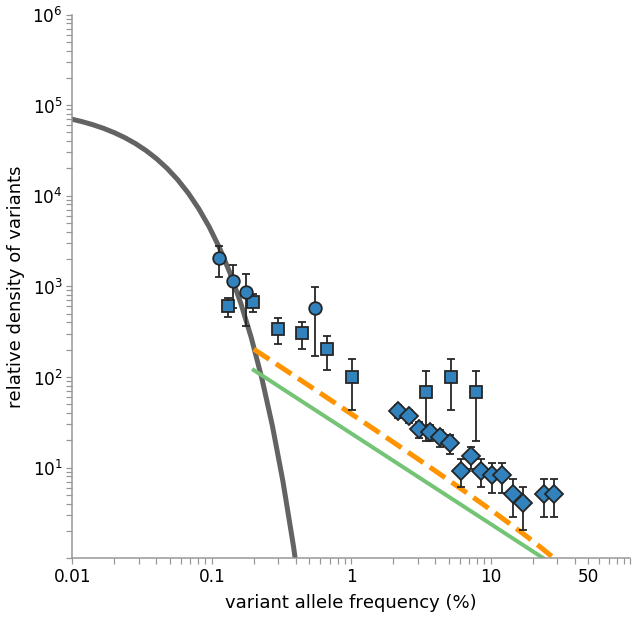

In [51]:
#Plotting the histogram 

plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

Boltonmarker='D'
Razavimarker='s'
Youngmarker= 'o'
neutralcolor=c3

m_size = 14
Boltonmarkersize = m_size*0.9
Razavimarkersize = m_size*0.9
Youngmarkersize = m_size*0.9


#Synoymous variants (all genes)

Bolton_synonymous_bins = 16
plot_log_hist_data_exclude_singletons(Bolton_synonymous_trimmed_list, Boltontotal, Bolton_synonymous_mu, Bolton_synonymous_bins, \
                            'Bolton 2020', Boltonmarker, Boltonmarkersize, blue4)
Razavi_synonymous_bins = 11
plot_log_hist_data_exclude_singletons(Razavi_synonymous_trimmed_list, Razavitotal, Razavi_synonymous_mu, Razavi_synonymous_bins, \
                            'Razavi 2019', Razavimarker, Razavimarkersize, blue4)
Young_synonymous_bins = 9
plot_log_hist_data_exclude_singletons(Young_synonymous_trimmed_list, Youngtotal, Young_synonymous_mu, Young_synonymous_bins, \
                            'Young 2016 & 2019', Youngmarker, Youngmarkersize, blue4)



x=np.linspace(np.log(10**-4), np.log(0.4999), 50)
x_passenger=np.linspace(np.log(phi), np.log(0.4999), 50)

neutral_single_y_Bolton=[logProbtheory_actual_ages_drift(l, N_tau, list_of_Bolton_ages) for l in x]
ax1.plot(x, neutral_single_y_Bolton, zorder=0, c = grey4, lw = 5, label= 'neutral drift')

# passenger prediction is based on Bolton data
print('best_fit_haploid_driver_rate_blood', best_fit_haploid_driver_rate_blood)

# hitchhiker_y_best_fit_Bolton=[logProbtheory_actual_ages_hitch_DFE(l, [p_inferred, q_inferred, best_fit_haploid_driver_rate_blood], N_tau, s_tolerance, s_max_inferred, list_of_Bolton_ages) for l in x_passenger]
print('hitchhiker_y_best_fit_Bolton based on all 4160 ages', hitchhiker_y_best_fit_Bolton)

# hitchhiker_y_best_fit_Bolton=[logProbtheory_actual_ages_hitch_DFE(l, [p_inferred, q_inferred, top_10_genes_nonsyn_seen_mu], N_tau, s_tolerance, s_max_inferred, list_of_Bolton_ages) for l in x_passenger]
hitchhiker_y_fixed_Bolton = [hitchhiker_y_best_fit_Bolton[i]+np.log(top_10_genes_nonsyn_seen_mu/best_fit_haploid_driver_rate_blood) for i in range(len(hitchhiker_y_best_fit_Bolton))]
print('len(hitchhiker_y_fixed_Bolton)', len(hitchhiker_y_fixed_Bolton))

early_developmentals_y=[logProbtheory_ages_dev(l, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu) for l in x_passenger]
ax1.plot(x_passenger, early_developmentals_y, c = green3, lw = 4, label= 'dev. mutations')
print('len(early_developmentals_y)', len(early_developmentals_y))

early_developmentals_and_hitchhiker_fixed = [np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_fixed_Bolton[i])) for i in range(len(early_developmentals_y))]
ax1.plot(x_passenger, early_developmentals_and_hitchhiker_fixed, c = c3, lw = 5, linestyle='--',  label= 'dev. mutations +\npassengers \n(all nonsyn SNV. \n from Bolton 2020)')

# early_developmentals_and_hitchhiker_best_fit=[np.log(np.exp(early_developmentals_y[i])+np.exp(hitchhiker_y_best_fit_Bolton[i])) for i in range(len(early_developmentals_y))]
# ax1.plot(x_passenger, early_developmentals_and_hitchhiker_best_fit, c = c3, lw = 5, label= 'best-fit')

# ax1.fill_between(x_passenger, early_developmentals_and_hitchhiker_best_fit, y2=early_developmentals_and_hitchhiker_fixed, \
#                 color = c3, alpha = 0.3, edgecolor = 'white')


# Plotting nonsynonymous VAF spectra
# Bolton_nonsynonymous_bins = 7

# Bolton_top6variant_mu = 0
# list_of_Bolton_top_6_variants_VAF= []
# for variant, variant_mut_rate in top6_best_fit_u.items():
#     Bolton_top6variant_mu = Bolton_top6variant_mu + variant_mut_rate
#     for VAF in map_variant_to_VAFs[variant]:
#         list_of_Bolton_top_6_variants_VAF.append(VAF)
    
# print('\nBolton_top6variant_mu', Bolton_top6variant_mu)

# plot_log_hist_data_for_plot_solid_smaller_greyout(list_of_Bolton_top_6_variants_VAF, Boltontotal, Bolton_top6variant_mu, Bolton_nonsynonymous_bins, \
#                         '', Boltonmarker, Boltonmarkersize, grey3)


# beneficial_rescaled_y = []
# x_ben=np.linspace(np.log(10**-4),np.log(0.49999),100)
# for l in x_ben:
#     linear_densities_summed_top6variants = 0
# #  top6variants_fitness is defined at the end of the notebook under the 'Top 20 variants' subheading
#     for variant, s in top6_best_fit_s.items():
        
#         variant_mut_rate = top6_best_fit_u[variant]
#         lin_tmp = lin_nonsyn_density_cohort_ages(l, N_tau, variant_mut_rate, s, list_of_Bolton_ages)/(2*Bolton_top6variant_mu) #for normalization according to mutation rates of the particular variant
#         linear_densities_summed_top6variants = linear_densities_summed_top6variants + lin_tmp
        
#     log_densities_summed_top6variants = np.log(linear_densities_summed_top6variants)
#     beneficial_rescaled_y.append(log_densities_summed_top6variants)
# ax1.plot(x_ben, beneficial_rescaled_y, c = grey3, lw = 4)
# print('beneficial_rescaled_y', beneficial_rescaled_y)

# ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.2, 0.2), frameon=0, fontsize = 14)

# plt.savefig('Passenger_prediction_based_on_Bolton_v6_panel_rcum_best_fit_versus_top_10_genes_against_top_6_variants.pdf',bbox_inches='tight')
plt.savefig('Passenger_prediction_top_10_for_SMB_1.pdf',bbox_inches='tight')

plt.show()


In [42]:

hitchhiker_y_best_fit_Bolton = [6.095721527176007, 5.979616643489178, 5.863114439461113, 5.746209377340547, 5.628898088874194, 5.511178862273408, 5.393050941053757, 5.274513687063596, 5.155565663409571, 5.036203698305791, 4.916421999742233, 4.796211379997953, 4.675558616810515, 4.55443878712453, 4.43283543431467, 4.310732399590798, 4.188087820164887, 4.064864401031536, 3.9410200325615237, 3.8165073779702414, 3.691274408313386, 3.5652596213104366, 3.438399620901142, 3.3106195674873393, 3.181835878533593, 3.051953511377059, 2.9208634892611003, 2.7884398099678203, 2.654535459390754, 2.518977500515649, 2.3815599680668598, 2.242035497736624, 2.1001032938710225, 1.9553930676852602, 1.807442711998916, 1.6556667099071098, 1.4993103745242964, 1.3373818750058308, 1.1685482240030212, 0.9909705424482971, 0.8020324016307883, 0.5978697557314927, 0.3725083273440384, 0.11616113041651045, -0.18846083441412975, -0.5752062422936157, -1.1210242858035697, -2.0485165893127895, -4.398080686316528, -660.9467997779875]

beneficial_rescaled_y = [11.496819867256429, 11.49605908530688, 11.495257382830724, 11.494412180081756, 11.493520758608252, 11.492580262402672, 11.49158769801895, 11.490539933329375, 11.489433694717428, 11.488265562614108, 11.487031965407137, 11.485729171900552, 11.484353282675052, 11.482900220875933, 11.481365723099357, 11.479745331117934, 11.478034385150053, 11.476228019221788, 11.474321158913671, 11.472308521474597, 11.470184617988272, 11.467943757062285, 11.465580049424068, 11.4630874128632, 11.460459577121833, 11.457690088529612, 11.454772314314289, 11.451699446517862, 11.448464505285033, 11.445060341010262, 11.44147963453466, 11.437714894401086, 11.433758450205598, 11.429602441361562, 11.42523880107462, 11.420659235904274, 11.415855201828231, 11.410817878117172, 11.405538140515844, 11.400006535222625, 11.39421325502825, 11.388148118797229, 11.381800555322872, 11.375159592497107, 11.368213852715833, 11.360951555472383, 11.353360528144528, 11.345428226016319, 11.337141762559455, 11.328487950909025, 11.319453357310087, 11.310024367108298, 11.300187263625288, 11.289928319972095, 11.279233903431624, 11.268090591378565, 11.256485296739095, 11.244405399773049, 11.231838881684219, 11.218774454539137, 11.205201681529923, 11.191111081991274, 11.176494216848418, 11.161343752233142, 11.145653501653024, 11.129418450113619, 11.112634766815482, 11.095299816403278, 11.077412182216579, 11.05897171857857, 11.039979652840156, 11.020438761653883, 11.000353649821204, 10.979731164189989, 10.958580979769847, 10.936916400860035, 10.91475542688235, 10.892122140914694, 10.869048488517215, 10.845576525217785, 10.82176122354484, 10.797673947136802, 10.773406725764822, 10.74907751109897, 10.72483667400022, 10.700875139965426, 10.677434771332836, 10.654821909198509, 10.633425393681307, 10.61374091918053, 10.596404433152854, 10.582239143683498, 10.572325553651739, 10.568116512679286, 10.57164901277073, 10.585966064128659, 10.615963930351018, 10.669954517886165, 10.7602856843957, -45.41614815050329]
